In [ ]:
# Data Programming 2nd coursework
# Date : 14/01/2019
# Student's Name : Fabio Caputo 

# CHURN PREDICTION IN THE TELECOM INDUSTRY

# Table of Contents

1. [INTRODUCTION](#h1)

   * 1.1 [Churn in the telecom industry](#h1.1)
   * 1.2 [The purpose of the experiment : Predicting Churn in Telecom Industry](#h1.2)
   

2. [METHODS](#h2)

   * 2.1 [Setting off to build the ML model](#h2.1)
       * 2.1.1 [Import of Python packages](#h2.1.1)
       * 2.1.2 [Importing the Data Set](#h2.1.2)
   * 2.2 [The Telecom data at a glance](#h2.2)
   * 2.3 [Data Preparation and Manipulation](#h2.3)
       * 2.3.1 [Some Data Cleansing](#h2.3.1)
       * 2.3.2 [Handling the missing values](#h2.3.2)
    
   * 2.4 [Data Visualisation](#h2.4)
       * 2.4.1 [Churn distribution in the telecom data](#h2.4.1)
       * 2.4.2 [Numerical variables distribution](#h2.4.2)
           * 2.4.2.1 [Tenure, MonthlyCharges, TotalCharges](#h2.4.2.1)
           * 2.4.2.2 [Tenure, MonthlyCharges, TotalCharges by Churn](#h2.4.2.2)
       * 2.4.3 [Categorical variables distribution](h2.4.3)
       * 2.4.4 [Numeric and categorical variables jointly](#h2.4.4)
           * 2.4.4.1 [Box-plots of categorical variables by tenure, MonthlyCharges, TotalCharges](#h2.4.4.1)
    
   * 2.5 [Data preprocessing](#h2.5)
       * 2.5.1 [Handling categorical variables : one-hot encoding](#h2.5.1)
       * 2.5.2 [Splitting the data set into training, validation and test data sets](#h2.5.2)
       * 2.5.3 [Normalising Training Data Prior to Split into Partial Training and Validation Data Sets](#h2.5.3)
       * 2.5.4 [Correlation matrix of the data sets generated](#2.5.4)
    
    
3. [CLASSIFICATION MODELS](#h3)
   * 3.1 [Logistic Regression](#h3.1)
       * 3.1.1 [Model building](#h3.1.1)
       * 3.1.2 [Model validation and plotting the results](#h3.1.2)
       * 3.1.3 [Model validation results interpretation](#h3.1.3)
       * 3.1.4 [Model Validation Results - Searching for the optimal  probability cut-off value](#h3.1.4)
       * 3.1.5 [Performing feature selection to enhance the model](#h3.1.5)
           * 3.1.5.1 [Backward Feature Selection (p-value)](#h3.1.5.1)
           * 3.1.5.2 [Model Validation results (Forward selection)](#h3.1.5.2)
       * 3.1.6 [Testing the logistic regression model](#h3.1.6)
       * 3.1.7 [Features coefficients interpretation](#h3.1.7)


4. [EVALUATION](#h4)

   * 4.1 [Conclusions](#h4.1)
   * 4.2 [Areas of uncertainty and further development](#h4.2)


<a id='h1'></a>

# 1. INTRODUCTION

<a id='h1.1'></a>

## 1.1 Churn in the Telcommunications industry

In telecommunications industry, customers are able to choose among multiple service providers and actively exercise their right of switching from one service provider to another. 

In this strongly competitive market,customers demand better services at less price, while service providers constantly focus on retention as their business goal. In this context it is important to manage the phenomenon of churn, i.e. the propensity of customers to cease doing business with a company in a given time period. 

Given the fact that the telecommunications industry experiences high churn rate and it costs more to recruit a new customer than to retain an existing one, customer retention is clearly more important than customer acquisition.

Many telecommunications companies apply retention strategies to keep customers longer. With retention strategies in place, many companies start to include churn reduction as one of their business goals. A good prediction of the next leaving customer, leads marketing managers to conceive targeted retention strategies.

<a id='h1.2'></a>

## 1.2 The Purpose of the Experiment : Predicting Churn in Telecom Industry

Among the most common problems addressed with the use of Machine Learning (ML) is worth mentioning:

1. Binary Classification
2. Multiclass Classification
3. Regression

Binary classification is a type of supervised learning, a method of machine learning where the categories are predefined, and is used to categorise new probabilistic observations into said categories. When there are only two categories the problem is known as binary classification.

We wish to create a ML model able to correctly classify as many instances of customer churn in a telecom operator as possible. 

For this reason, a telecom data set freely available on the internet has been downloaded - further detail about the data set can be found in the rest of the document.

As a minimum, we expect +50% of the churn instances to be correctly classified. A model that returns an accuracy less or equal than 50% has certainly poor predictive power - to the point that tossing a coin might give higher probability to correctly predict the event than using the algorithm generated.

A model that hits the minimum target of +50% accuracy and achieves a moderately high accuracy might be more or less useful. This because investing resources to retain customers who are, in reality, not likely to churn represents a cost opportunity and might lead to revenue loss for the telecom operator.

On the contrary, a high accuracy in distinguishing probable churners from non-churners would allow to put in place marketing actions to retain and re-engage customers who are intended to churn.

<a id='h2'></a>

# 2. METHODS

<a id='h2.1'></a>

## 2.1. Setting Off to Build the ML model

<a id='h2.1.1'></a>
### 2.1.1. Import of Python Packages

In [381]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns 
import plotly.offline as py #visualization
py.init_notebook_mode(connected=True) #visualization
import plotly.graph_objs as go #visualization
import plotly.tools as tls #visualization
import plotly.figure_factory as ff #visualization
from sklearn.metrics import confusion_matrix, classification_report ,accuracy_score, roc_auc_score,roc_curve, scorer
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf # This import allows us to use R-style function (y ~ x; x predicts y)

<a id='h2.1.2'></a>
### 2.1.2 Importing the data set



<a id='h2.1.2'></a>
#### The data set is available on the IBM website. The URL is reported below :
https://www.ibm.com/communities/analytics/watson-analytics-blog/predictive-insights-in-the-telco-customer-churn-data-set/

In [425]:
telecom_data=pd.read_csv('C:/Users/Fabio Caputo/Desktop/DL/Courseworks/IBM/WA_Fn-UseC_-Telco-Customer-Churn.csv')

### The data set includes information about:
Customers who left within the last month – the column is called Churn.

Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies.

Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges.

Demographic info about customers – gender, age range, and if they have partners and dependents.

In [116]:
telecom_data.tail()

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...   \
7038          Yes               Yes             DSL            Yes  ...    
7039          Yes               Yes     Fiber optic             No  ...    
7040           No  No phone service             DSL            Yes  ...    
7041          Yes               Yes     Fiber optic             No  ...    
7042          Yes                No     Fiber optic            Yes  ...    

     DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
7038              Yes         Yes         Yes             Yes        One year   
7039              Yes          No         Yes             Yes        One year   
7040               No          No          No              No  Month-to-month   
7041               No          No          No              No  Month-to-month   
7042              Yes         Yes         Yes             Yes        Two year   

     PaperlessBilling              PaymentMethod MonthlyCharges  TotalCharges  \
7038              Yes               Mailed check          84.80        1990.5   
7039              Yes    Credit card (automatic)         103.20        7362.9   
7040              Yes           Electronic check          29.60        346.45   
7041              Yes               Mailed check          74.40         306.6   
7042              Yes  Bank transfer (automatic)         105.65        6844.5   

     Churn  
7038    No  
7039    No  
7040    No  
7041   Yes  
7042    No  

[5 rows x 21 columns]

<a id='h2.2'></a>
## 2.2 The telecom data at a glance

In [117]:
# Let's have a look at the data:
# Shape:
print('DATA SET SHAPE :'+'\n'+str(telecom_data.shape[0])+' rows,\n'+str(telecom_data.shape[1])+' columns')
# Columns name:
print('\nCOLUMNS NAMES: \n'+str(telecom_data.columns))
# Data types:
print('\nDATA TYPES :')
telecom_data.info()
# Unique Values:
print ('\nUNIQUE VALUES :  \n',str(telecom_data.nunique()))
# some statistics related to the numeric variables:
print('\nNUMERIC VARIABLES DESCRIPTIVE STATS :\n'+str(telecom_data.describe()))
# Missing values:
print('\nMISSING VALUES:\n',telecom_data.isnull().sum().values.sum())

DATA SET SHAPE :
7043 rows,
21 columns

COLUMNS NAMES: 
Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

DATA TYPES :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null 

<a id='h2.3'></a>
# 2.3 Data Preparation and Manipulation

<a id='h2.3'></a>
## 2.3.1 Some Data Cleansing

 Turning all the variable into object, as it seems to be appropriate for most of them
 Then , converting into numeric the variables that need this transformation - i.e. tenure, MonthlyCharges, TotalCharges

In [426]:

def type_converter(data):
    for col  in data.columns:
        data[col] = data[col].astype('object',copy=False)

    data["tenure"] = data["tenure"].astype(float)
    data["MonthlyCharges"] = data["MonthlyCharges"].astype(float)
    data["TotalCharges"] = data.TotalCharges.convert_objects(convert_numeric=True)
    print('\n\n'+str(data.info())+'\n')
    return data

In [427]:
type_converter(telecom_data)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning:

convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null object
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null float64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7032 non-null float64
Churn               7043 non-null object
dtypes: float64(3), object(18

customerID  gender SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female             0     Yes         No     1.0   
1     5575-GNVDE    Male             0      No         No    34.0   
2     3668-QPYBK    Male             0      No         No     2.0   
3     7795-CFOCW    Male             0      No         No    45.0   
4     9237-HQITU  Female             0      No         No     2.0   
5     9305-CDSKC  Female             0      No         No     8.0   
6     1452-KIOVK    Male             0      No        Yes    22.0   
7     6713-OKOMC  Female             0      No         No    10.0   
8     7892-POOKP  Female             0     Yes         No    28.0   
9     6388-TABGU    Male             0      No        Yes    62.0   
10    9763-GRSKD    Male             0     Yes        Yes    13.0   
11    7469-LKBCI    Male             0      No         No    16.0   
12    8091-TTVAX    Male             0     Yes         No    58.0   
13    0280-XJGEX    Male             0      No         No    49.0   
14    5129-JLPIS    Male             0      No         No    25.0   
15    3655-SNQYZ  Female             0     Yes        Yes    69.0   
16    8191-XWSZG  Female             0      No         No    52.0   
17    9959-WOFKT    Male             0      No        Yes    71.0   
18    4190-MFLUW  Female             0     Yes        Yes    10.0   
19    4183-MYFRB  Female             0      No         No    21.0   
20    8779-QRDMV    Male             1      No         No     1.0   
21    1680-VDCWW    Male             0     Yes         No    12.0   
22    1066-JKSGK    Male             0      No         No     1.0   
23    3638-WEABW  Female             0     Yes         No    58.0   
24    6322-HRPFA    Male             0     Yes        Yes    49.0   
25    6865-JZNKO  Female             0      No         No    30.0   
26    6467-CHFZW    Male             0     Yes        Yes    47.0   
27    8665-UTDHZ    Male             0     Yes        Yes     1.0   
28    5248-YGIJN    Male             0     Yes         No    72.0   
29    8773-HHUOZ  Female             0      No        Yes    17.0   
...          ...     ...           ...     ...        ...     ...   
7013  1685-BQULA  Female             0      No         No    40.0   
7014  9053-EJUNL    Male             0      No         No    41.0   
7015  0666-UXTJO    Male             1     Yes         No    34.0   
7016  1471-GIQKQ  Female             0      No         No     1.0   
7017  4807-IZYOZ  Female             0      No         No    51.0   
7018  1122-JWTJW    Male             0     Yes        Yes     1.0   
7019  9710-NJERN  Female             0      No         No    39.0   
7020  9837-FWLCH    Male             0     Yes        Yes    12.0   
7021  1699-HPSBG    Male             0      No         No    12.0   
7022  7203-OYKCT    Male             0      No         No    72.0   
7023  1035-IPQPU  Female             1     Yes         No    63.0   
7024  7398-LXGYX    Male             0     Yes         No    44.0   
7025  2823-LKABH  Female             0      No         No    18.0   
7026  8775-CEBBJ  Female             0      No         No     9.0   
7027  0550-DCXLH    Male             0      No         No    13.0   
7028  9281-CEDRU  Female             0     Yes         No    68.0   
7029  2235-DWLJU  Female             1      No         No     6.0   
7030  0871-OPBXW  Female             0      No         No     2.0   
7031  3605-JISKB    Male             1     Yes         No    55.0   
7032  6894-LFHLY    Male             1      No         No     1.0   
7033  9767-FFLEM    Male             0      No         No    38.0   
7034  0639-TSIQW  Female             0      No         No    67.0   
7035  8456-QDAVC    Male             0      No         No    19.0   
7036  7750-EYXWZ  Female             0      No         No    12.0   
7037  2569-WGERO  Female             0      No         No    72.0   
7038  6840-RESVB    Male             0     Yes        Yes    24.0   
7039

Replaced 'No internet service' to No for the following columns (cause they mean the same).

In 'Multiple Lines' : replaced 'No phone service' with 'no' - is the same than the value 'no' - so it has been manipulated accordingly.

Replaced values '0','1' for the field 'SeniorCitizen' to 'No' for '0' and 'Yes' for '1'  - to have it with the same text values code than the other categorical variables

In [428]:
#replace 'No internet service' to No for the following columns (cause they mean the same)
# NOTE : 'Multiple Lines' -- 'No phone service' is the same than the value 'no'
replace_cols = [ 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                'TechSupport','StreamingTV', 'StreamingMovies']
for i in replace_cols : 
    telecom_data[i]  = telecom_data[i].replace({'No internet service' : 'No'})
    
#replace values for 'SeniorCitizen' - to bring it onto the same value code than the other categorical variable..
telecom_data["SeniorCitizen"] = telecom_data["SeniorCitizen"].replace({1:"Yes",0:"No"})

telecom_data.head()

customerID  gender SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female            No     Yes         No     1.0           No   
1  5575-GNVDE    Male            No      No         No    34.0          Yes   
2  3668-QPYBK    Male            No      No         No     2.0          Yes   
3  7795-CFOCW    Male            No      No         No    45.0           No   
4  9237-HQITU  Female            No      No         No     2.0          Yes   

      MultipleLines InternetService OnlineSecurity  ...   DeviceProtection  \
0  No phone service             DSL             No  ...                 No   
1                No             DSL            Yes  ...                Yes   
2                No             DSL            Yes  ...                 No   
3  No phone service             DSL            Yes  ...                Yes   
4                No     Fiber optic             No  ...                 No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges  Churn  
0           Electronic check          29.85         29.85     No  
1               Mailed check          56.95       1889.50     No  
2               Mailed check          53.85        108.15    Yes  
3  Bank transfer (automatic)          42.30       1840.75     No  
4           Electronic check          70.70        151.65    Yes  

[5 rows x 21 columns]

 Dropped the variable customerID - the customer identifier, out of the scope of the work

In [429]:
# we can drop the variable customerID - it is the custmer identifier, out of the scope of the work
telecom_data.drop(['customerID'],axis=1,inplace=True)
telecom_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
gender              7043 non-null object
SeniorCitizen       7043 non-null object
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null float64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7032 non-null float64
Churn               7043 non-null object
dtypes: float64(3), object(17)
memory usage: 1.1+ MB


<a id='h2.3.2'></a>

## 2.3.2. Handling the Missing Values

In general, with machine learning, it's safe to input missing values as 0, with the condition that 0 isn't already a meaningful value. 

The algorithm will learn from exposure to the data that the value 0 means missing data and will start ignoring the value.

As this is the case in our telecom data set, we will proceed accordingly.

It will come out that there are missing values in the variable TotalCharges, before not detected because the feature comes as categorical from the original data set.


In [405]:
print('\nMISSING VALUES:\n'+str(telecom_data.isnull().sum()))


MISSING VALUES:
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


#### There are 11 missing values in TotalCharges variable

In [430]:
# There are 11 missing values in TotalCharges variable
missing = telecom_data.loc[pd.isna(telecom_data.TotalCharges),'TotalCharges']
display(missing)

488    NaN
753    NaN
936    NaN
1082   NaN
1340   NaN
3331   NaN
3826   NaN
4380   NaN
5218   NaN
6670   NaN
6754   NaN
Name: TotalCharges, dtype: float64

In [431]:
#missing_indeces=[488,753,936,1082,1340,3331,3826,4380,5218,6670,6754]
missing_indeces=missing.keys()
telecom_data.loc[pd.isnull(telecom_data.TotalCharges),'TotalCharges']=missing_indeces
print(telecom_data.loc[pd.isna(telecom_data.TotalCharges),'TotalCharges'])

Series([], Name: TotalCharges, dtype: float64)


In [432]:
print('\nMISSING VALUES:\n'+str(telecom_data.isnull().sum()))


MISSING VALUES:
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


<a id='h2.4'></a>
# 2.4. Data Visualisation

 Separate out numerical from categorical variables:

In [433]:
cols   = telecom_data.nunique()
print('Distinct values per variable:\n\n'+str(cols))
target_var=["Churn"]
cat_cols = telecom_data.nunique()[telecom_data.nunique() < 6].keys().tolist()
cat_cols= [x for x in cat_cols if x not in target_var ]
print('\nCategorical Variables:\n\n'+str(cat_cols))
num_cols = [x for x in telecom_data.columns if x not in cat_cols + target_var ]#+ target_col + Id_col]
print('\nNumeric Variables:\n\n'+str(num_cols))

Distinct values per variable:

gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         2
OnlineBackup           2
DeviceProtection       2
TechSupport            2
StreamingTV            2
StreamingMovies        2
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6541
Churn                  2
dtype: int64

Categorical Variables:

['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

Numeric Variables:

['tenure', 'MonthlyCharges', 'TotalCharges']


<a id='h2.4.1'></a>
## 2.4.1. Churn distribution in the telecom data

#### Nearly 27% of the customers in the telecom data set have churned in the last month. 
Most probably the dat set is an extraction from a larger set of data. If this were not the case, and if the extraction had been performed by stratifying the larger sample by frequency of churners, this would be an extremely high rate of churn that is usually observable in emerging, extremely competitive markets only

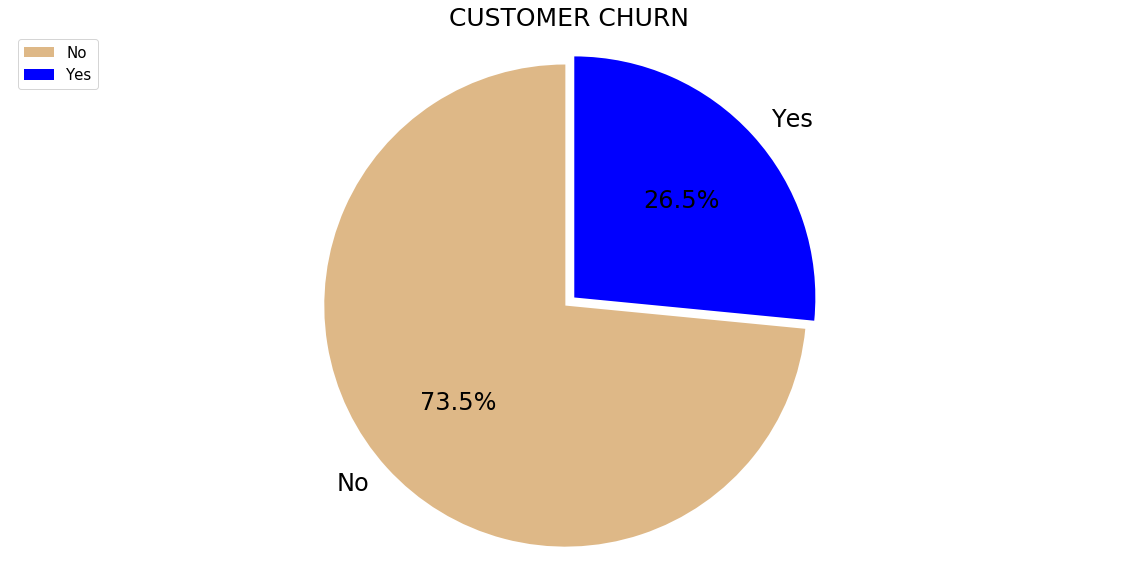

In [434]:

#labels
churn_distribution = telecom_data["Churn"].value_counts()
churn_labels=churn_distribution.keys().tolist()
#values
churn_frq_1 = telecom_data["Churn"].value_counts()
churn_frq_2=churn_frq_1.values.tolist()

Churn=telecom_data[telecom_data["Churn"] == "Yes"]
No_Churn=telecom_data[telecom_data["Churn"] == "No"]

# https://pythontic.com/visualization/charts/piechart
 
figureObject, axesObject = plt.subplots(figsize=(20,10))
explodeTuple = (0.05, 0.0)
# Draw the pie chart
plt.title('CUSTOMER CHURN',fontsize= 25)
axesObject.pie(
        churn_frq_2,
        colors=('burlywood','b'),
        explode=explodeTuple, 
        labels=churn_labels,
        autopct='%1.1f%%',
        textprops={'fontsize': 24},
        startangle=90,
        #shadow = True,
        frame= False#,
        #radius=8800
              )

plt.legend(loc='upper left',fontsize= 15)
# Aspect ratio - equal means pie is a circle
axesObject.axis('equal')
 
plt.show()

<a id='h2.4.2'></a>
## 2.4.2. Numerical Variables Distributions

<a id='h2.4.2.1'></a>
### 2.4.2.1. Tenure, MonthlyCharges, TotalCharges 

 When looking at the distributions of the numerical variables (tenure, MonthlyCharges and TotalCharges), we can immediately notice the - obvious - positive correlation between tenure of the customers and TotalCharges. 
 On the contraty, there doesn't seem to be a clear correlation between tenure and MonthlyCharges. A telecom operator might wish to see an increase on spending of their loyal customers over the time. From here we can't see any clear distinction in the average monthly spent based on the tenure of the customers. 

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning:

The `size` parameter has been renamed to `height`; pleaes update your code.



Text(0.5,1.02,'Telecom dataset - Numeric Variables')

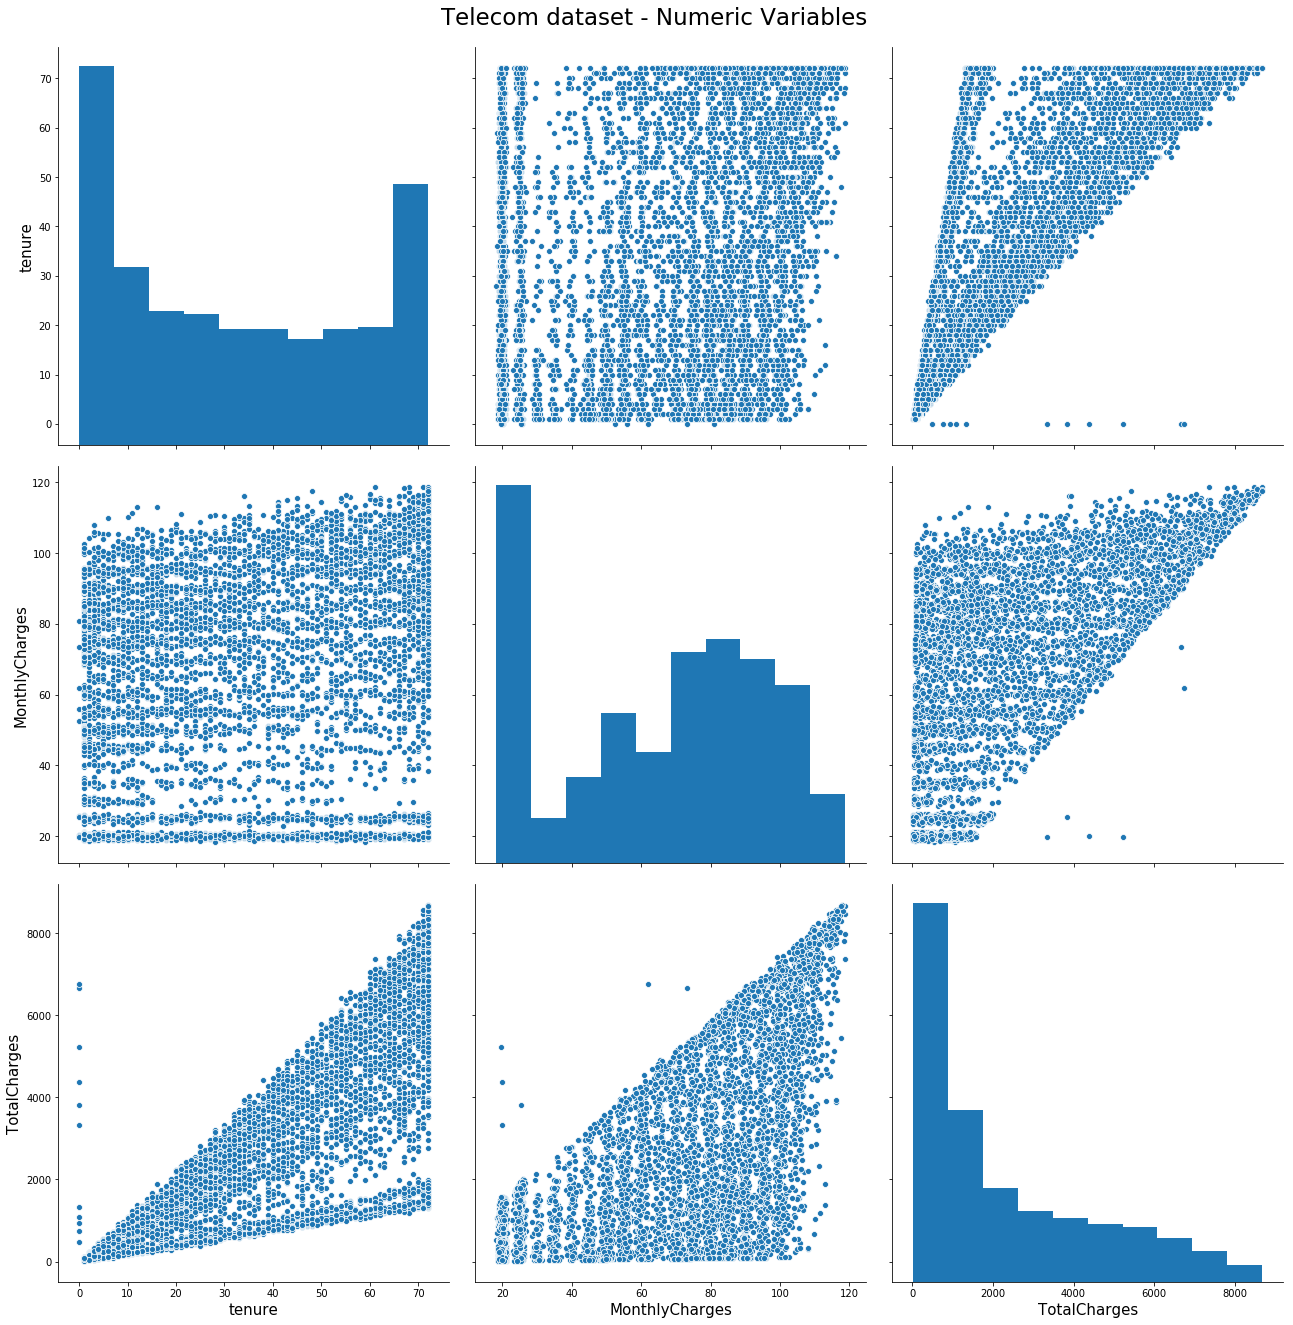

In [350]:
telecom_pairplot_1 = sns.pairplot(telecom_data[num_cols], size=6, )#diag_kind ="kde" ) # , plot_kws={"s": 3}
telecom_pairplot_1.fig.suptitle("Telecom dataset - Numeric Variables" , y=1.02, size=23)

<a id='h2.4.2.2'></a>
### 2.4.2. Tenure, MonthlyCharges, TotalCharges by Churn

#### 3d Scatterplot

In [382]:
Churn_Scatter = go.Scatter3d(x = Churn["MonthlyCharges"],
                      y = Churn["TotalCharges"],
                      z = Churn["tenure"],
                      mode = "markers",
                      name = "Churn",
                      marker = dict(size = 3,color = "orange")
                     )
No_Churn_Scatter = go.Scatter3d(x = No_Churn["MonthlyCharges"],
                      y = No_Churn["TotalCharges"],
                      z = No_Churn["tenure"],
                      name = "No Churn",
                      mode = "markers",
                      marker = dict(size = 3,color= "purple")
                     )

scatter_lay = go.Layout(dict(title = "Tenure, MonthlyCharges, TotalCharges by Churn in 3D",
                        scene = dict(camera = dict(up=dict(x= 0 , y=0, z=0),
                                                   center=dict(x=0, y=0, z=0),
                                                   eye=dict(x=1.25, y=1.25, z=1.25)),
                                     xaxis  = dict(title = "monthly charges",
                                                   gridcolor='rgb(255, 255, 255)',
                                                   zerolinecolor='rgb(255, 255, 255)',
                                                   showbackground=True,
                                                   backgroundcolor='rgb(230, 230,230)'),
                                     yaxis  = dict(title = "total charges",
                                                   gridcolor='rgb(255, 255, 255)',
                                                   zerolinecolor='rgb(255, 255, 255)',
                                                   showbackground=True,
                                                   backgroundcolor='rgb(230, 230,230)'
                                                  ),
                                     zaxis  = dict(title = "tenure",
                                                   gridcolor='rgb(255, 255, 255)',
                                                   zerolinecolor='rgb(255, 255, 255)',
                                                   showbackground=True,
                                                   backgroundcolor='rgb(230, 230,230)'
                                                  )
                                    ),
                        height = 700,
                       ))

my_data = [Churn_Scatter,No_Churn_Scatter]
Scatter_3d  = go.Figure(data = my_data, layout = scatter_lay)
py.iplot(Scatter_3d)


#### Joint distributions Plot

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning:

The `size` parameter has been renamed to `height`; pleaes update your code.

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



Text(0.5,1.02,'Telecom dataset - Numeric Variables by Churn')

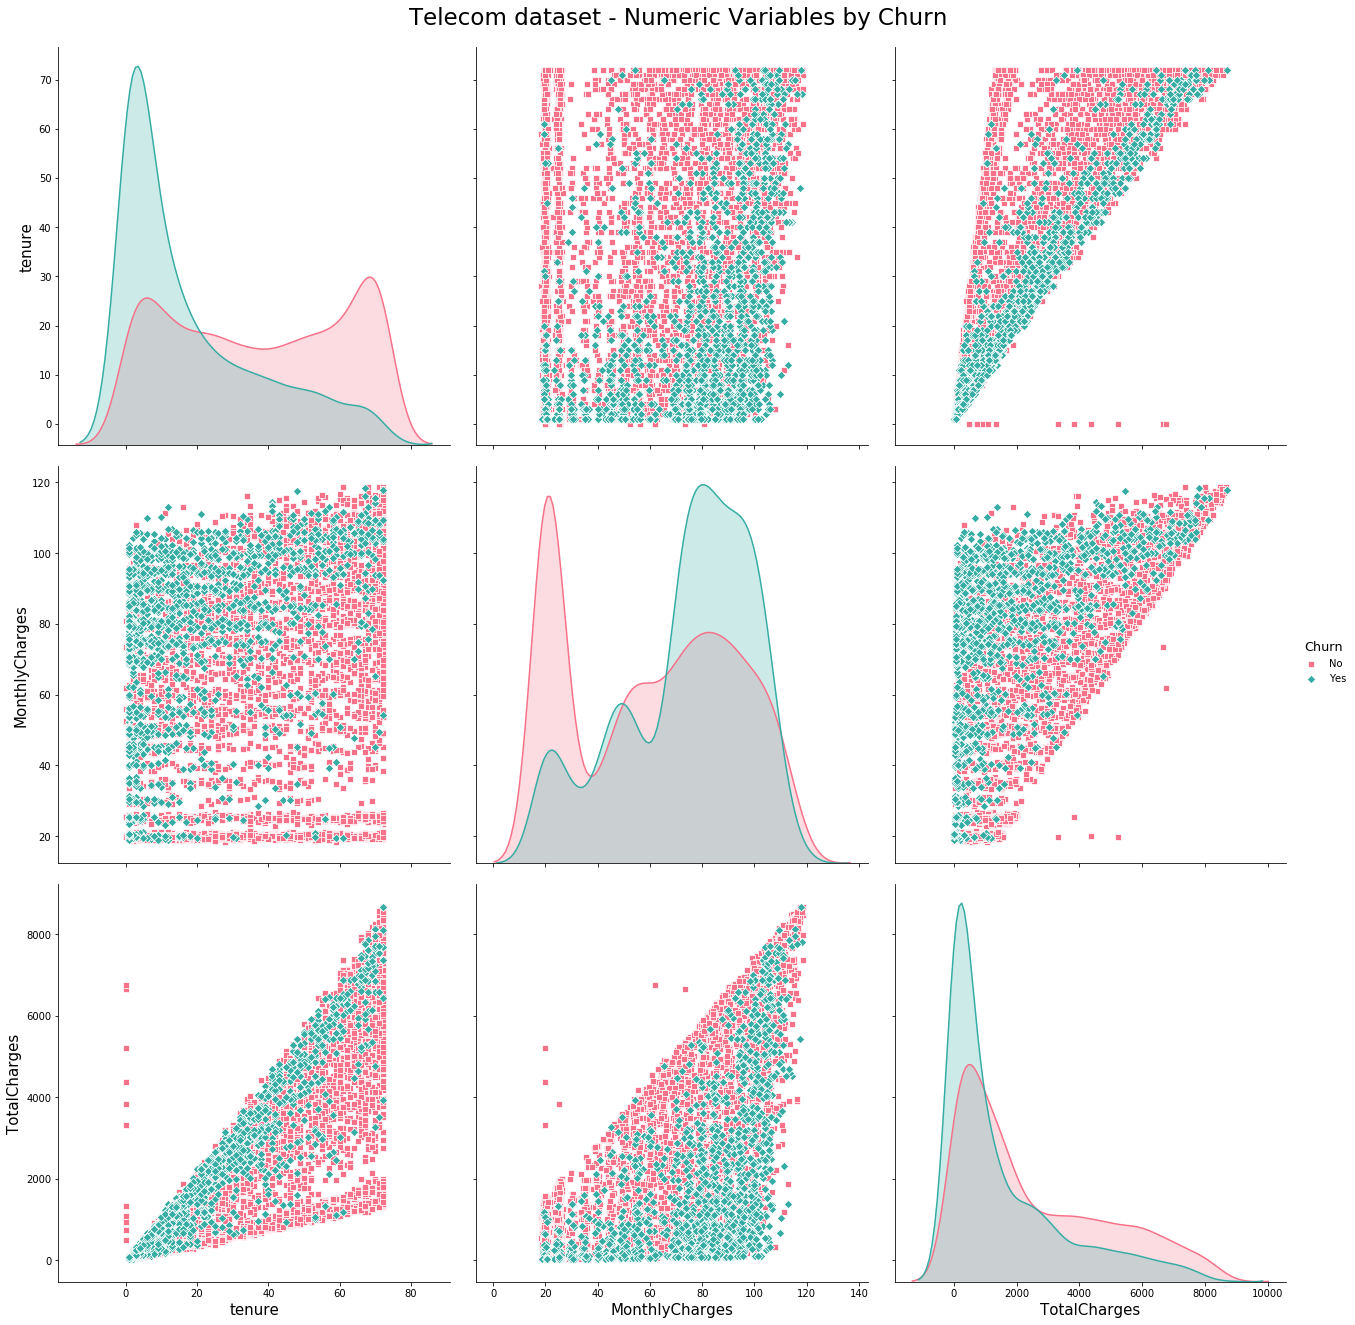

In [200]:
telecom_pairplot = sns.pairplot(telecom_data, hue='Churn', size=6 , palette="husl", markers=[ "s", "D"] ) # , plot_kws={"s": 3}
telecom_pairplot.fig.suptitle("Telecom dataset - Numeric Variables by Churn" , y=1.02, size=23)

When looking at the same variables split by churners and non churners, we can get hints about the different behaviour of the two groups.

As expected, there seem to be a positive linear relationship between MonthlyCharges and TotalCharges.

The distribution of tenure is clearly different for the two gorups : 
non churners' distributions looks positively skewed and their tenure seems to peak at ~ 30 months.
Churners, instead, reach up to ~ 70 months of tenure and seem to have a more uniform distribution.
This is also visible from the scatter plot of tenure and TotalCharges. Though for both groups the correlation between the two variables is cleaer, the light blue points - the churners - are mostly associated to higher values of charge than the pink points  - the non churners.

When plotting the regression line on the scatter plot with these two variables for churners and non churners separetely (see below), it is evident that
while the regression line for churners fits the data very well, the line on the graph of the non churners is way more heteroschedastic.
It might be worth investigating whether there is a customer loyalty problem with customers with tenure greater than two years - which might eventually be addressed with corrective marketing actions.

The monthly average charge distributions reveal that chuners' distribution is negatively skewed, and that a large part of the churners is customers with relatively higher average monthly charge.

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


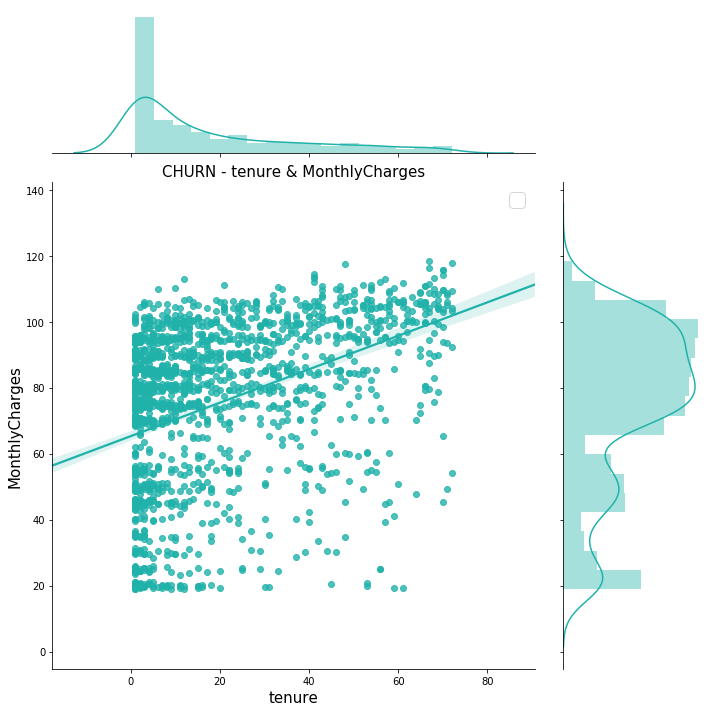

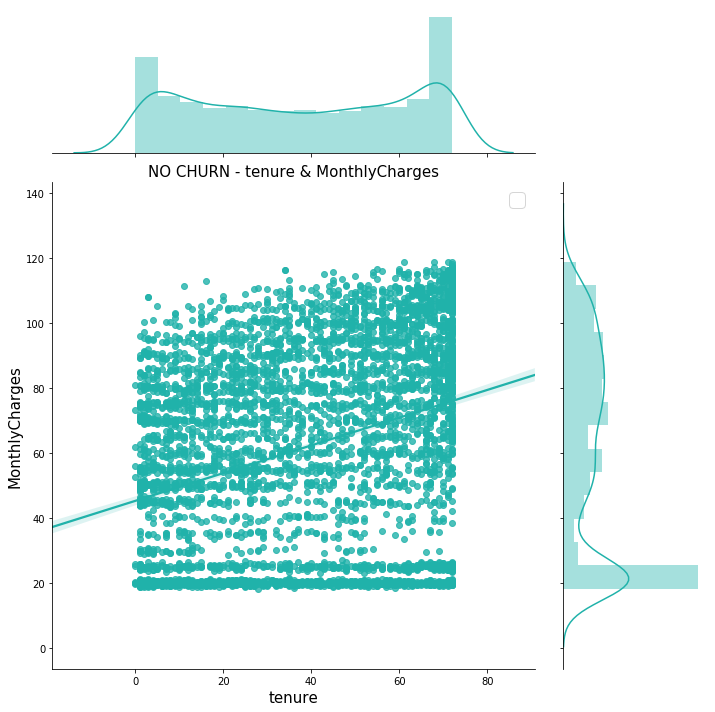

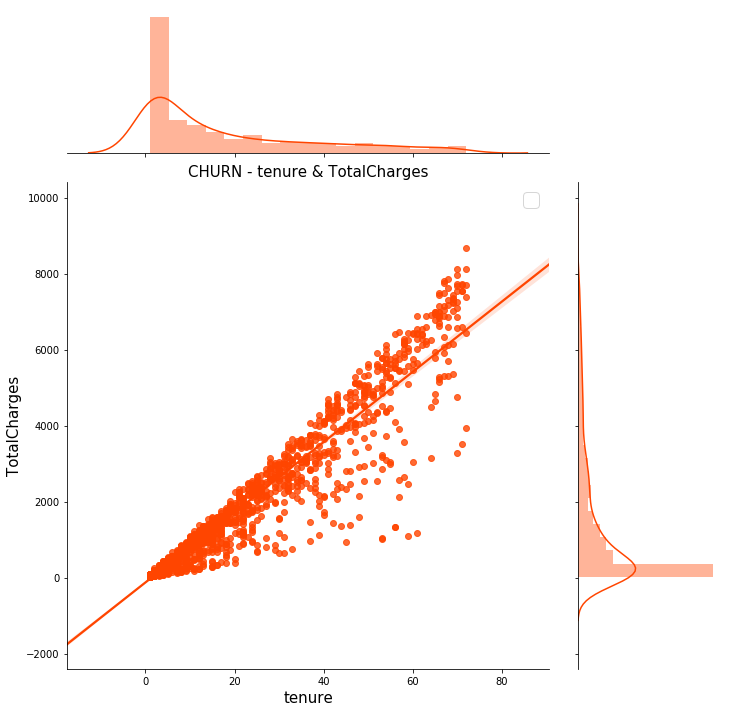

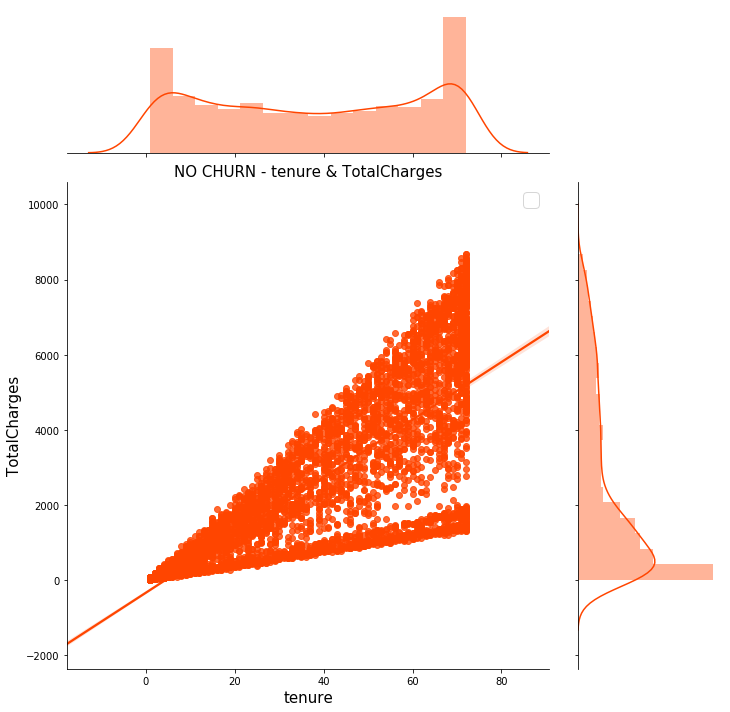

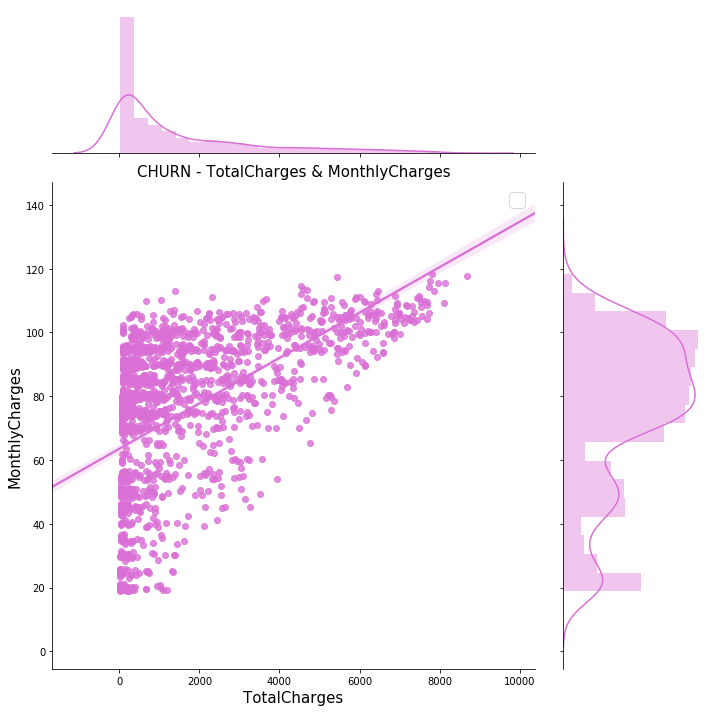

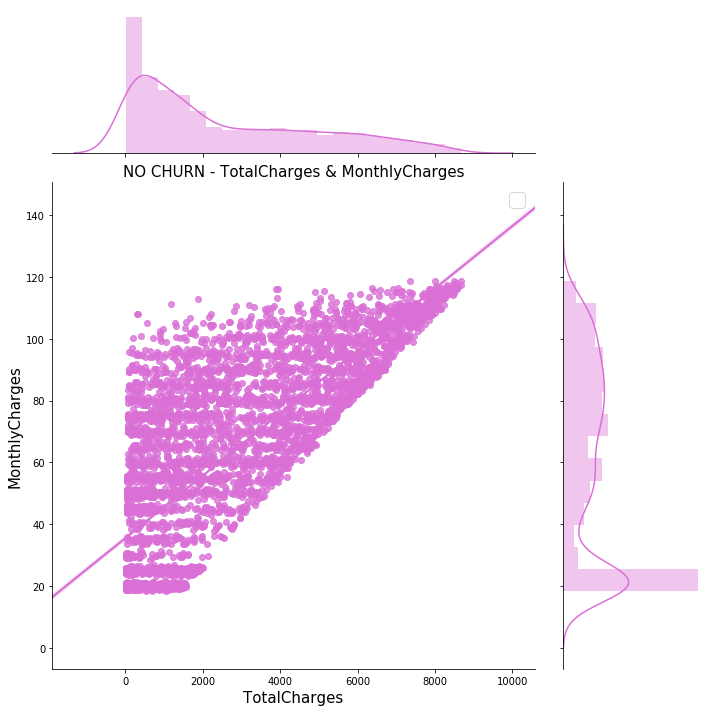

In [366]:
# Turning Churn values into numeric to be injested in the code below

c_Churn=telecom_data["Churn"] == "Yes"
c_No_Churn=telecom_data["Churn"] == "No"

def joint_properties(var1, var2, heigth, ratio, color, kind):
    import seaborn as sns
    sns.jointplot(telecom[var1][c_Churn],telecom[var2][c_Churn], height=heigth, ratio=ratio, color=color,kind=kind)
    plt.legend(scatterpoints=1, bbox_to_anchor=(1, 1), ncol=1,fontsize=20)
    plt.title(str("CHURN") + ' - ' + str(var1) + ' & ' + str(var2), fontsize=15)
    sns.jointplot(telecom[var1][c_No_Churn],telecom[var2][c_No_Churn],height=heigth, ratio=ratio, color=color,kind=kind)
    plt.legend(scatterpoints=1, bbox_to_anchor=(1, 1), ncol=1,fontsize=20)
    plt.title(str("NO CHURN") + ' - ' + str(var1) + ' & ' + str(var2), fontsize=15)
    
joint_properties( "tenure", "MonthlyCharges" , 10, 3, "lightseagreen" , "reg"     )
joint_properties( "tenure", "TotalCharges", 10, 3, "orangered"     , "reg"   )
joint_properties( "TotalCharges", "MonthlyCharges", 10, 3, "orchid", "reg"  )


<a id='h2.4.3'></a>
## 2.4.3. Categorical Variables Distributions

In [150]:
# https://plot.ly/python/pie-charts/

# This function plots donut charts for all the categorical variables, grouped by Churn value
def categorical_donuts(column) :
    
    churners_donuts = go.Pie(values  = Churn[column].value_counts().values.tolist(),
                    labels  = Churn[column].value_counts().keys().tolist(),
                    hoverinfo = "label+percent+name",
                    domain  = dict(x = [0,.48]),
                    name    = "Churn",
                    marker  = dict(line = dict(width = 2, color = "rgb(243,243,243)")), # to set the grey background
                    hole    = 0.6 # to create the donut chart (https://plot.ly/python/pie-charts/)
                    )
                             
    non_churners_donuts = go.Pie(values  = No_Churn[column].value_counts().values.tolist(),
                    labels  = No_Churn[column].value_counts().keys().tolist(),
                    hoverinfo = "label+percent+name",
                    domain  = dict(x = [.52,1]),
                    name    = "Churn",
                    marker  = dict(line = dict(width = 2, color = "rgb(243,243,243)")), # to set the grey background
                    hole    = 0.6 # to create the donut chart (https://plot.ly/python/pie-charts/)
                    )
    
    donuts_lay = go.Layout(dict(title = column + " distribution by churn ",
                            plot_bgcolor  = "rgb(243,243,243)",  # to set the grey background
                            paper_bgcolor = "rgb(243,243,243)",  # to set the grey background
                            annotations = [dict(
                                text = "Churn",
                                font = dict(size = 13),
                                showarrow = False,
                                x = .15, y = .5),
                                dict(text = "No churn",
                                font = dict(size = 13),
                                showarrow = False, x = 0.88, y = 0.5 )]))
                                                          
    # Put everything in 1 plot                         
    data = [churners_donuts, non_churners_donuts]
    my_plot  = go.Figure(data = data, layout = donuts_lay)
    # Plot
    py.iplot(my_plot)

#### When looking at the frequency of the categorical variables by churner and non churner, we see a significant differnece between the two groups for:
- SeniorCitizen : the % of SenioCitizen among churners is twice as high as it is among the non churners
- Partner : more widespread among non churners (53%) than churners (36%)
- Dependents : more widespread among non churners (35%) than churners (17%)
- InternetService : Nearly 70% of churners have a Fiber optic contract. This is very high compared to non churners (~ 35%)
- OnlineSecurity : Only 16% of the churners receive thsi service - ~ 33% among non churners
- TechSupport : The fraction of non churners receiving tech support is double than for the churners, approximately
- Contract : ~ 90% of churners have a month-to-month contract - whereas for non churners they represent 43% of the base
- PaperlessBilling : ~ 75% of churners receive paperless billing - ~ 50% for non churners
- PaymentMethod : Almost 60% of the churners pays by electronic check, out of 4 payment methods. This split is uniform for non churners instead

In [383]:
# Creating a loop to polt the donut churt for every categorical variable, by Churn
for i in cat_cols :
    categorical_donuts(i)

<a id='h2.4.4'></a>
## 2.4.4 Numerical and Categorical Variables jointly

<a id='h2.4.4.1'></a>
### 2.4.4.1. Box-Plots of Categorical Variables by tenure, MonthlyCharges, TotalCharges

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\pyplot.py:522: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



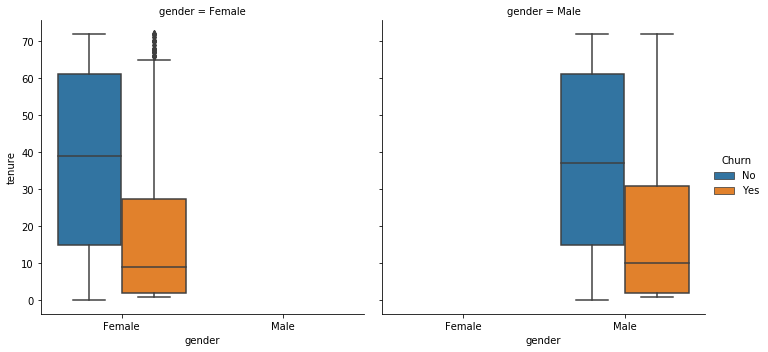

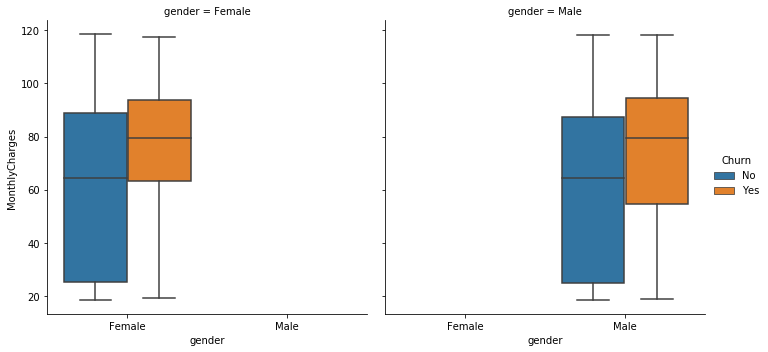

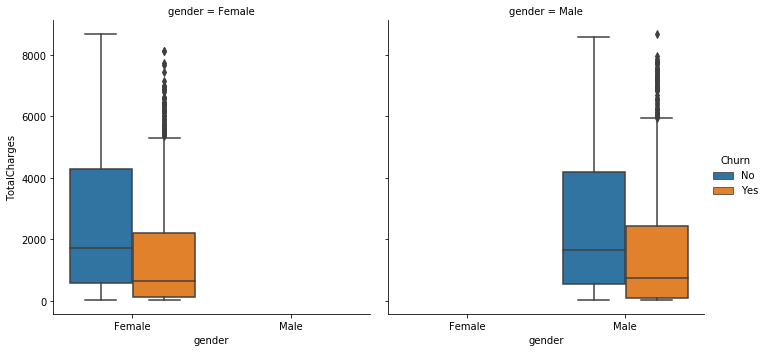

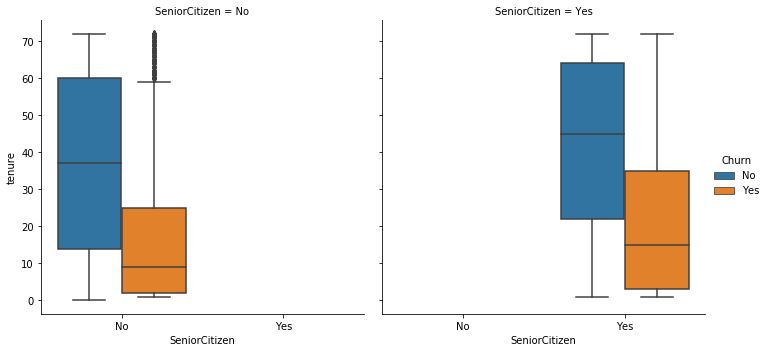

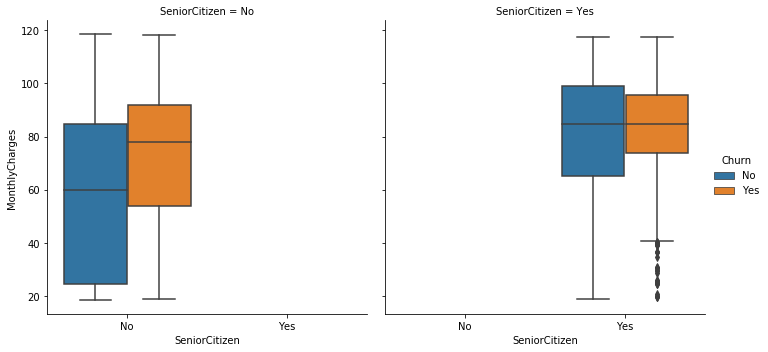

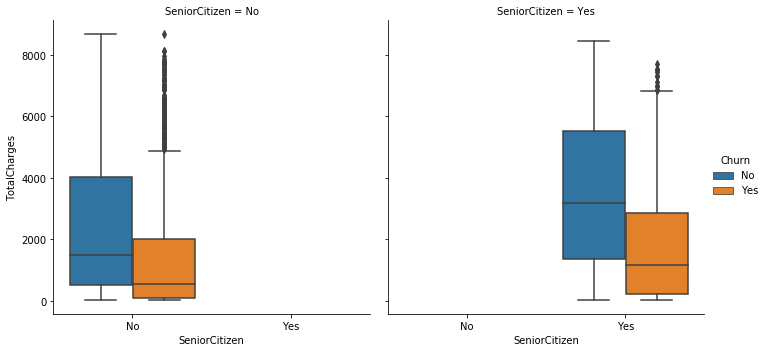

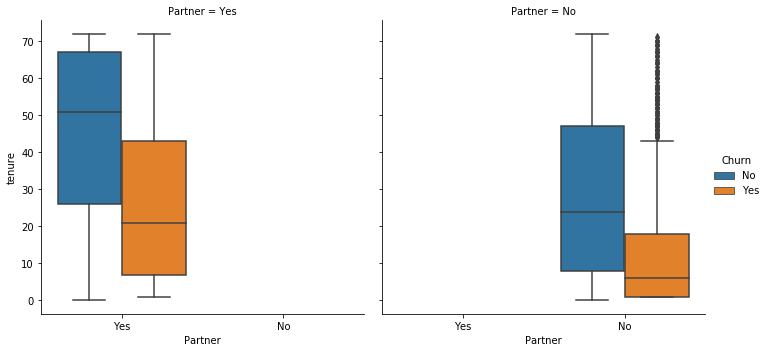

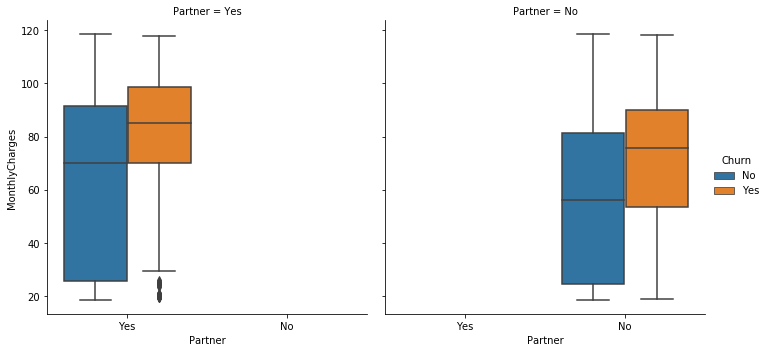

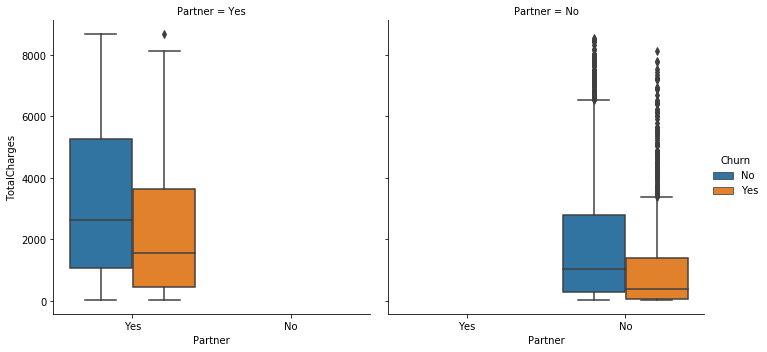

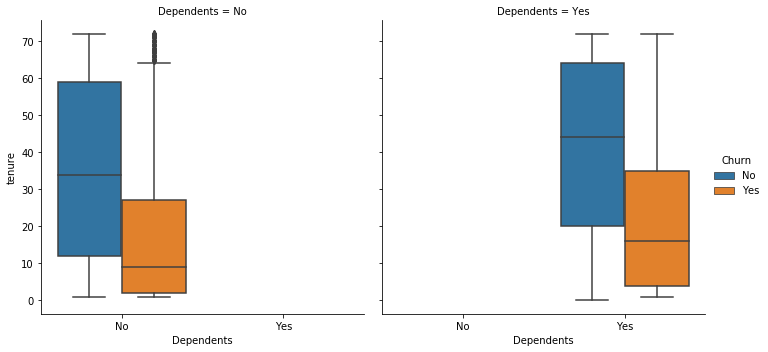

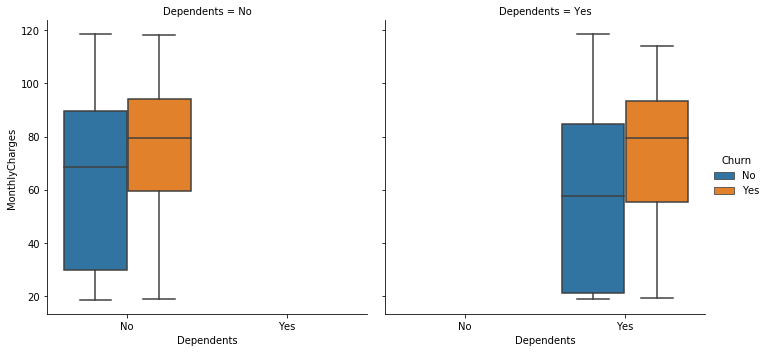

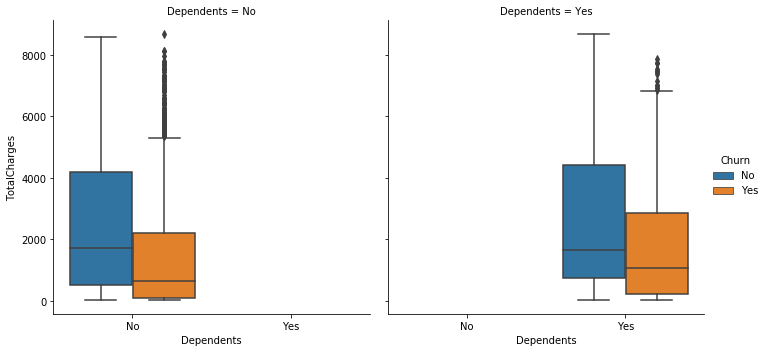

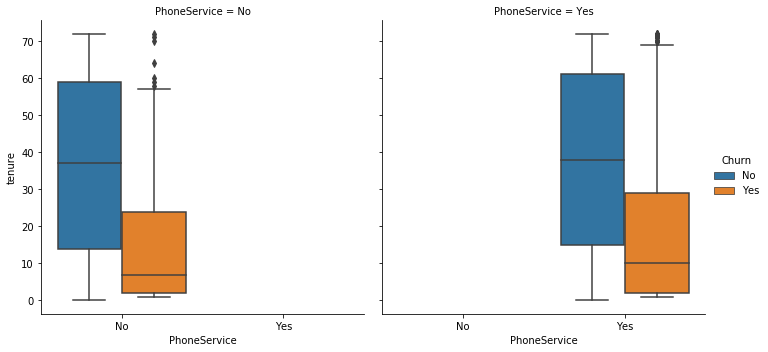

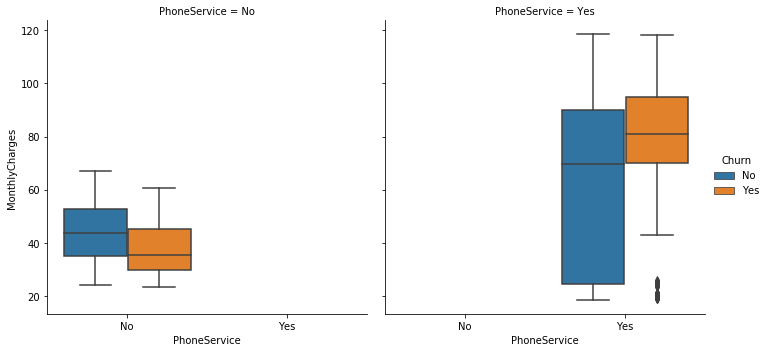

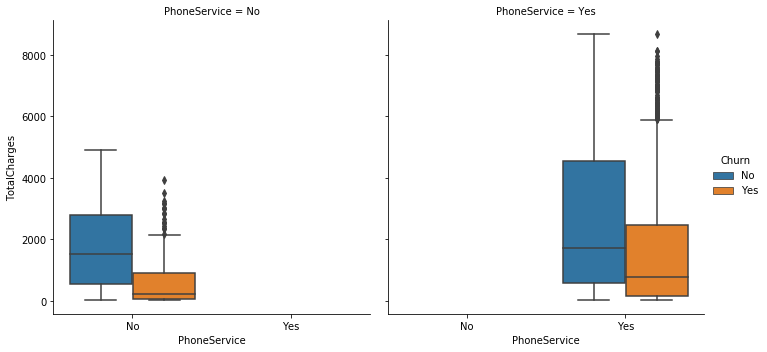

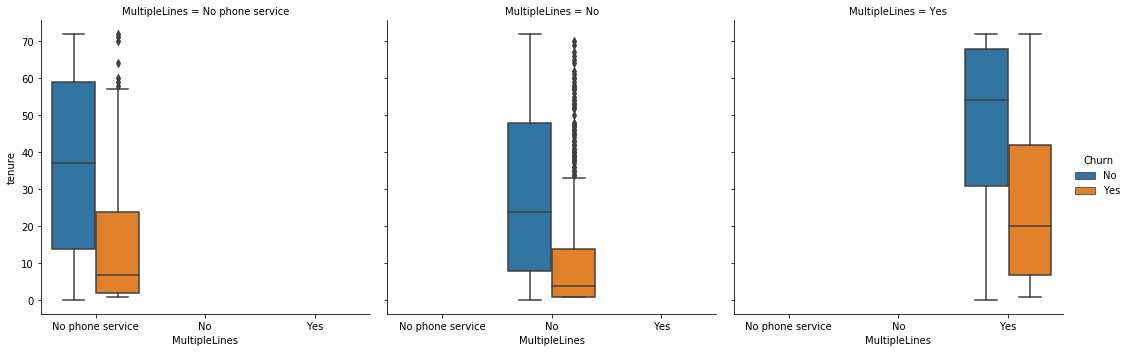

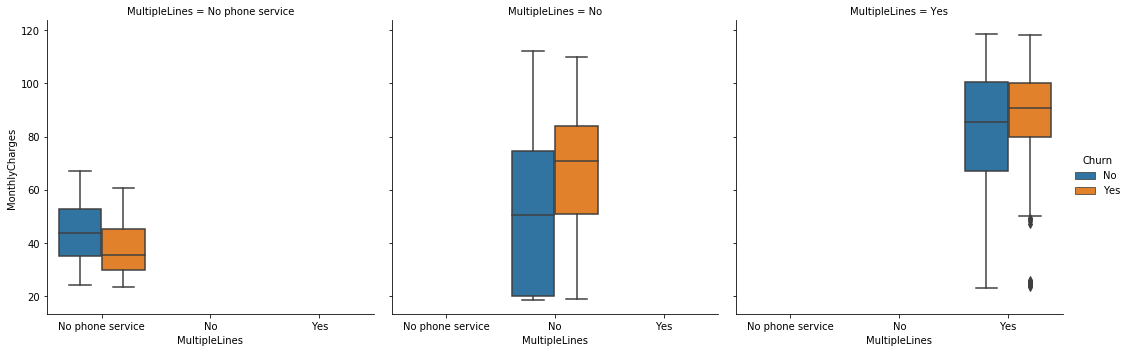

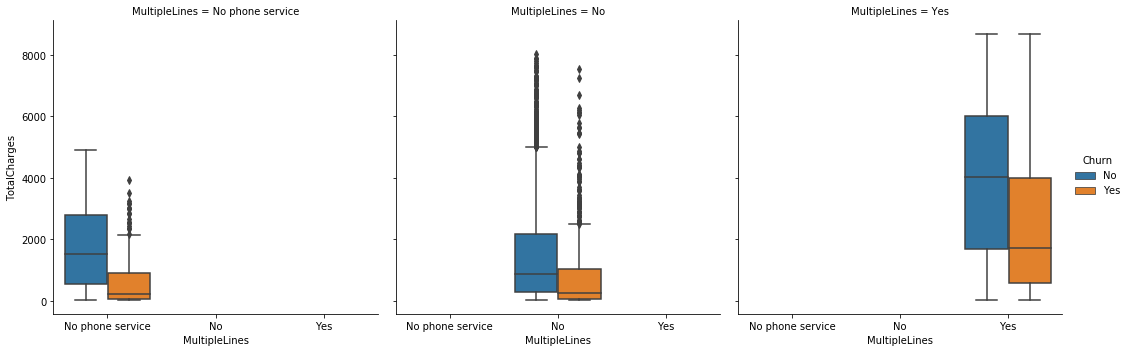

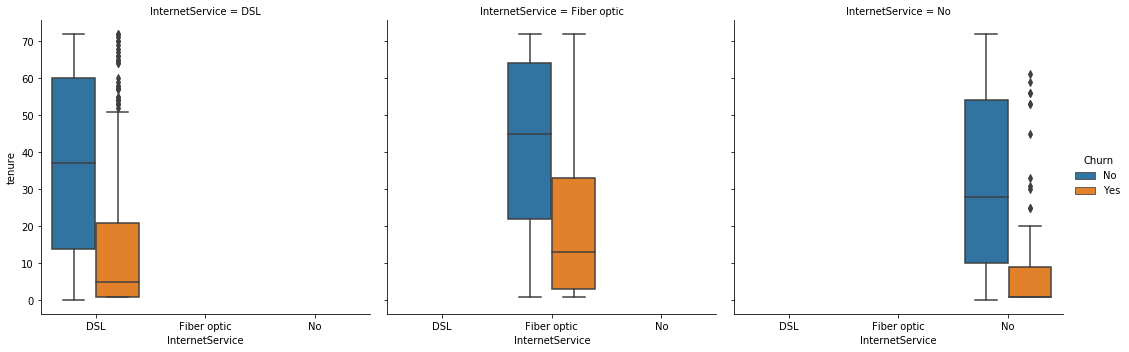

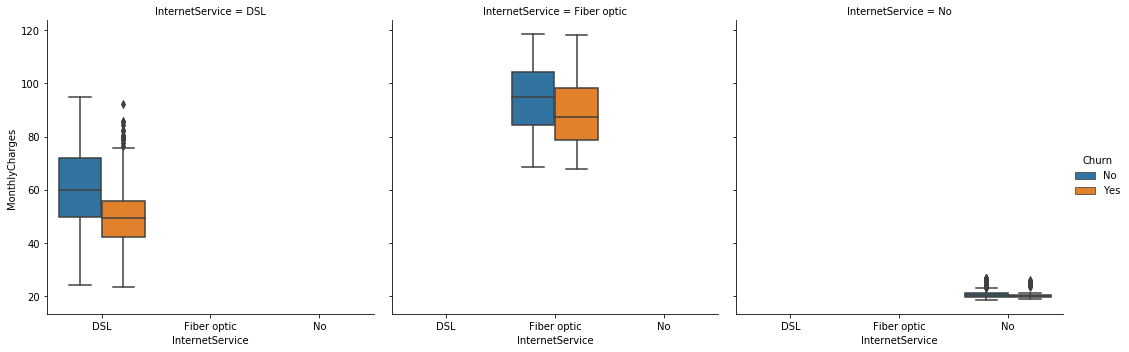

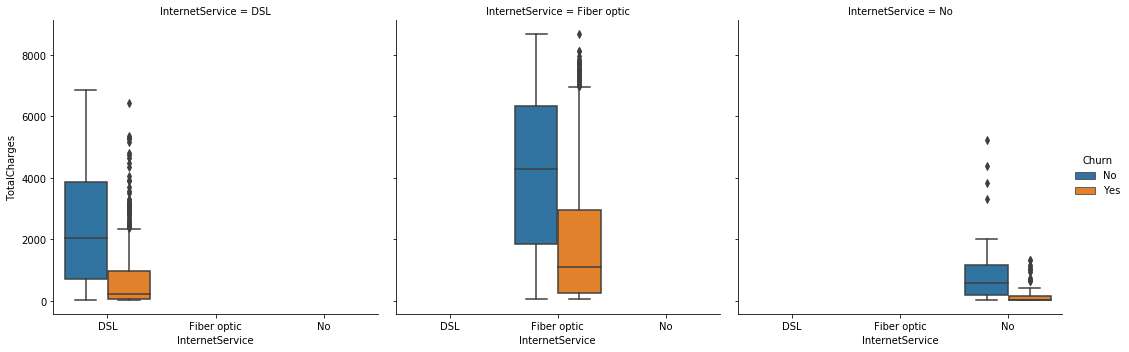

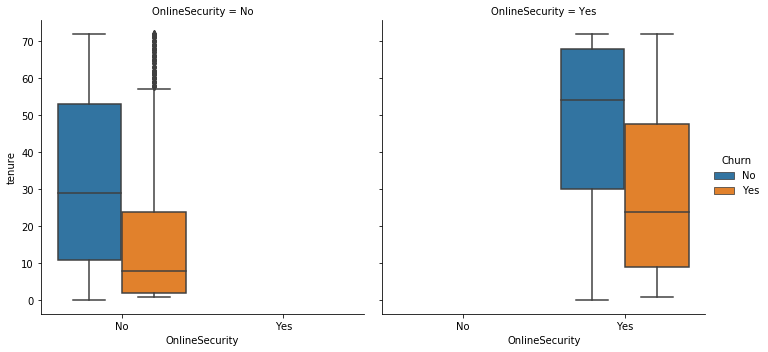

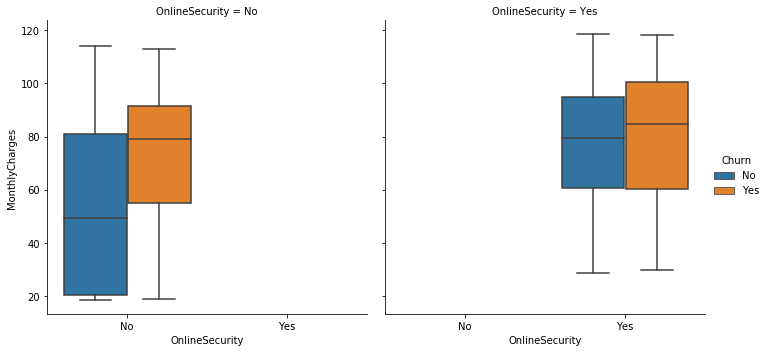

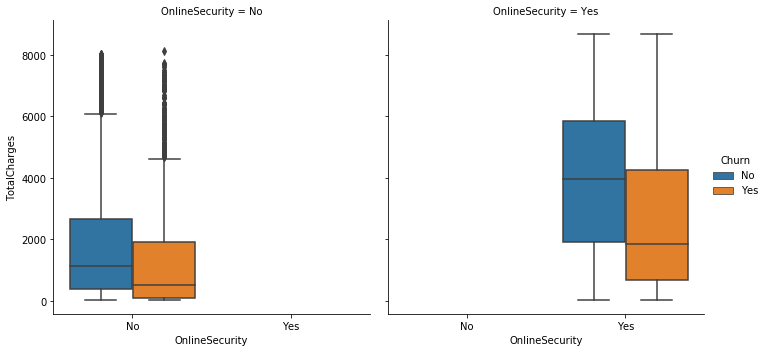

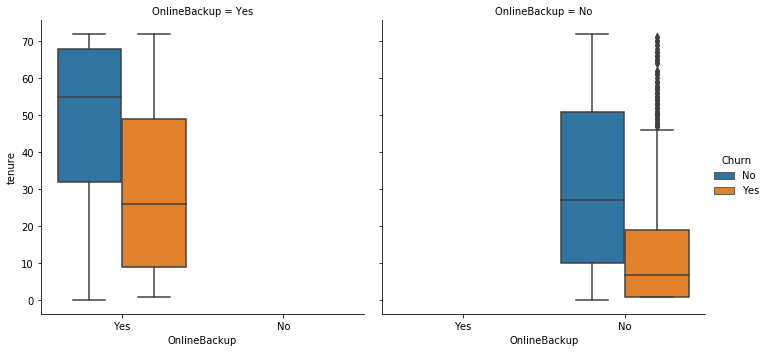

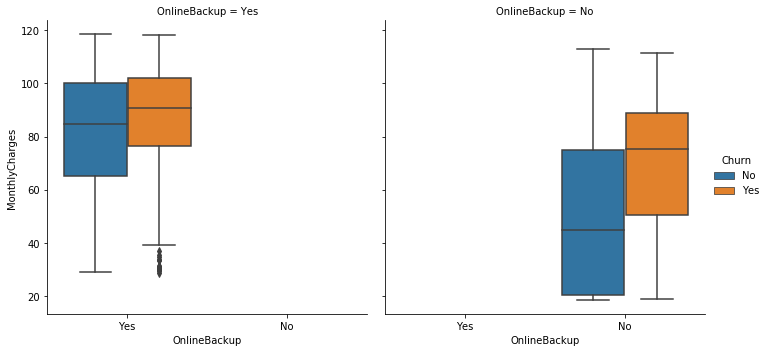

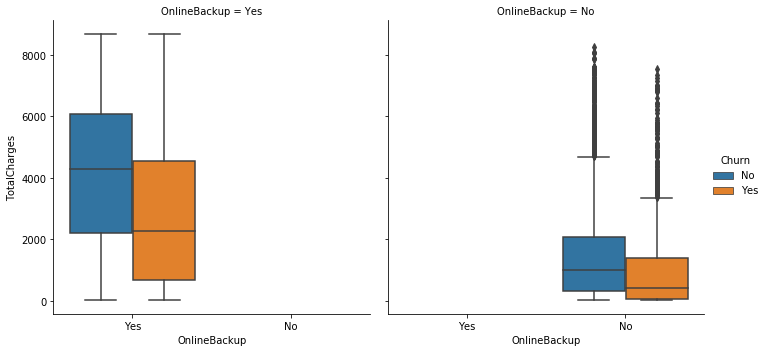

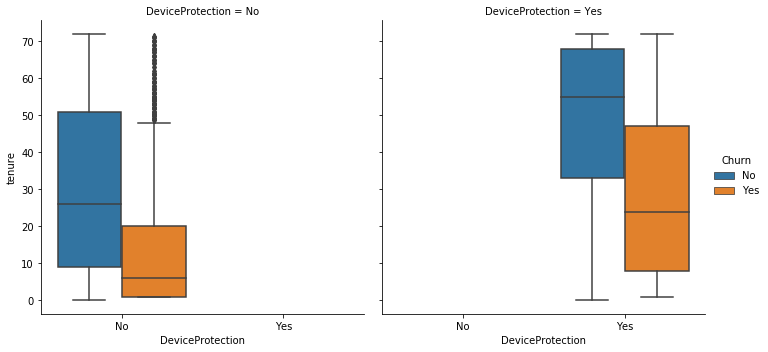

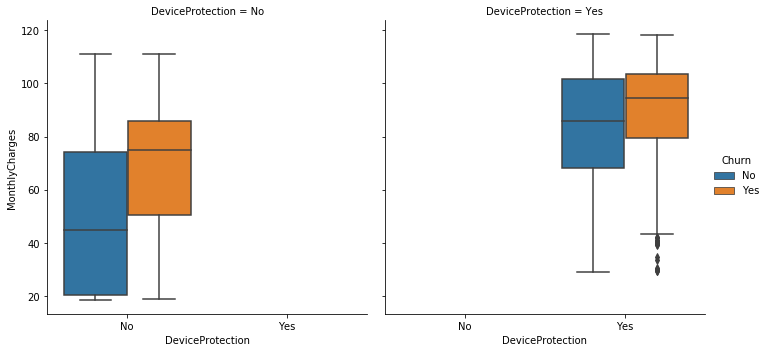

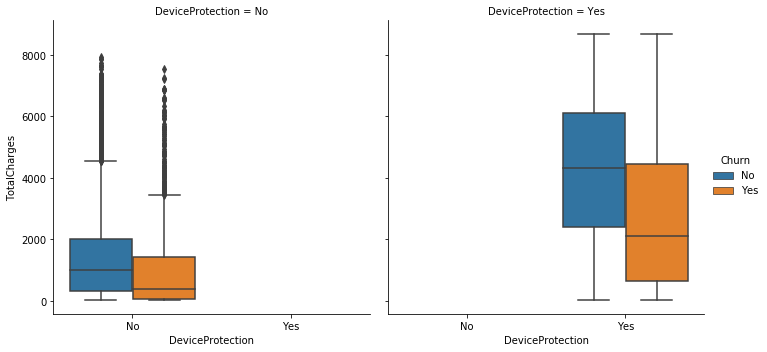

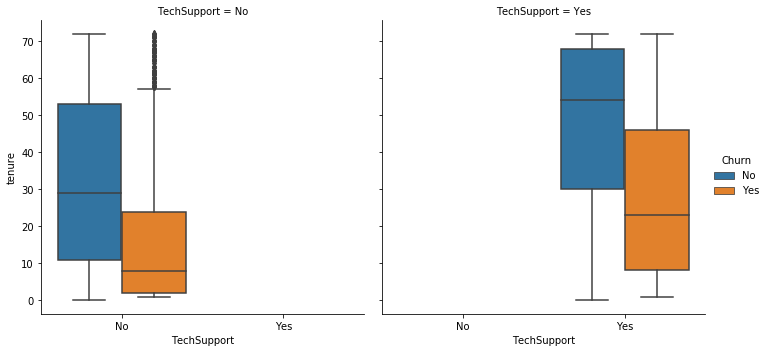

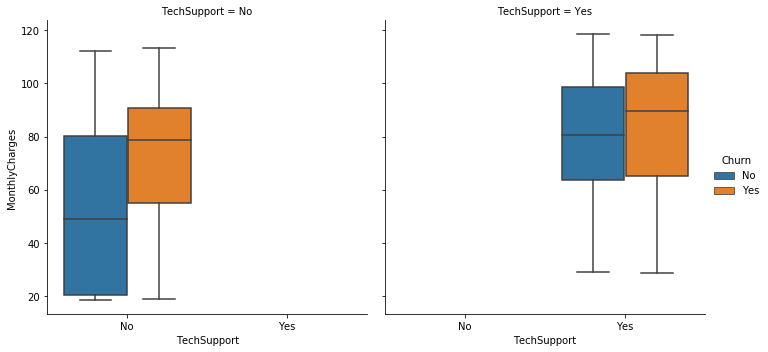

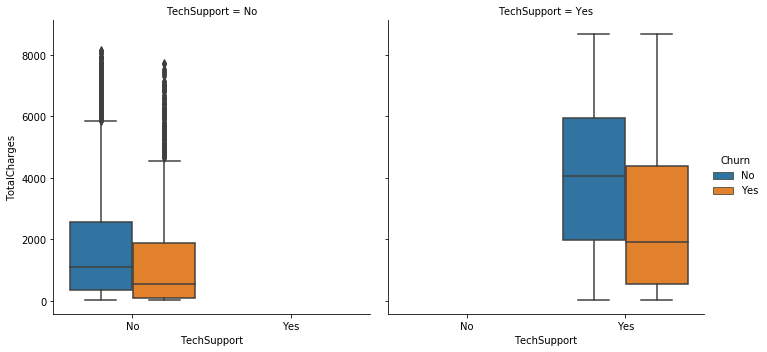

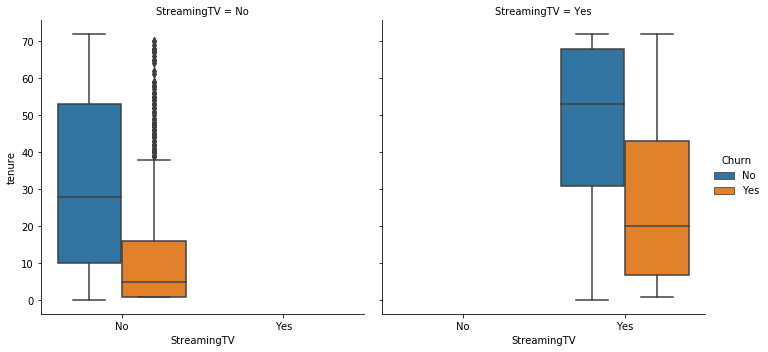

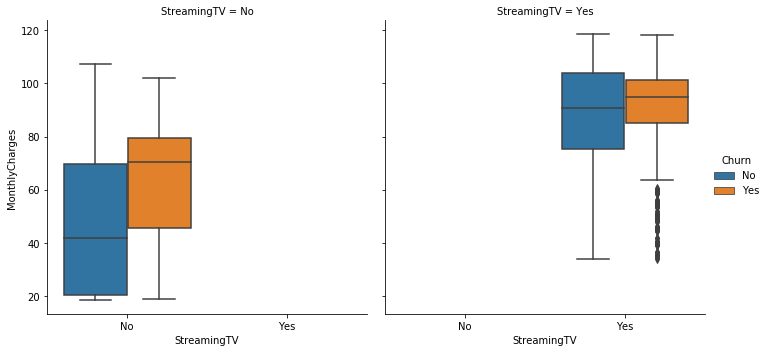

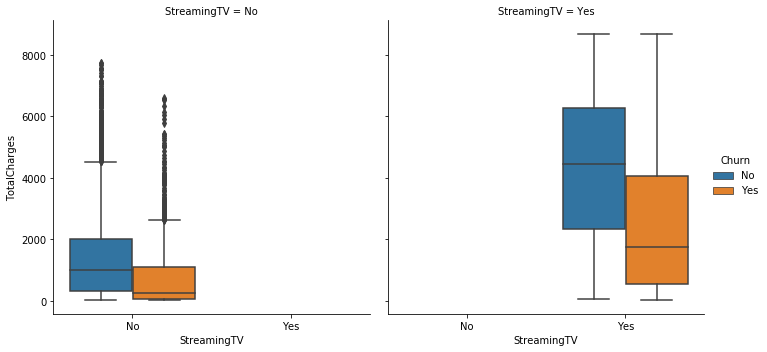

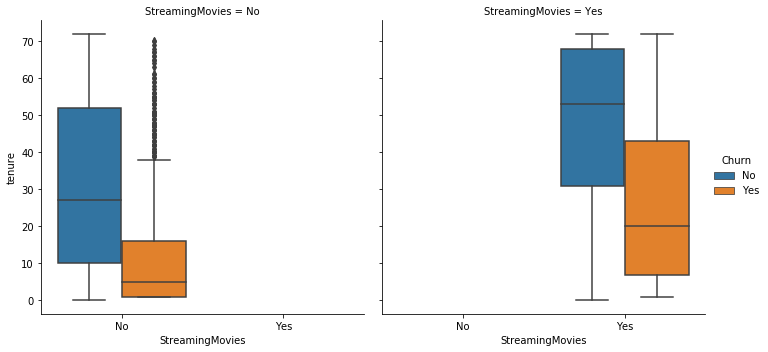

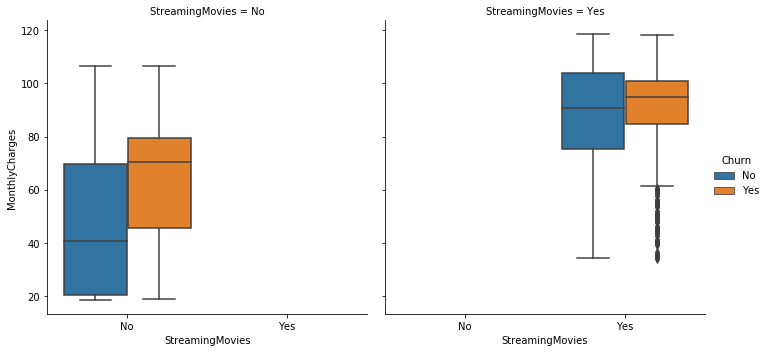

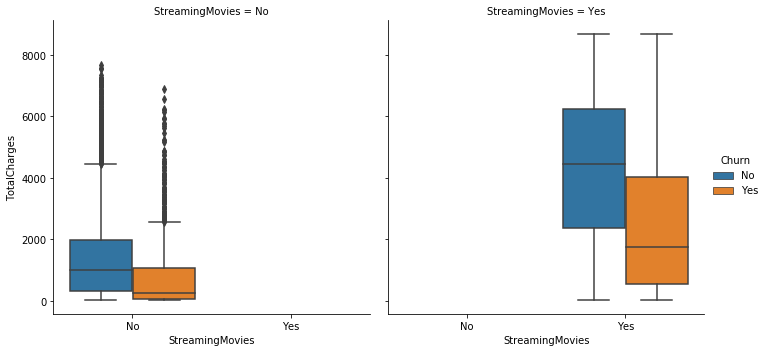

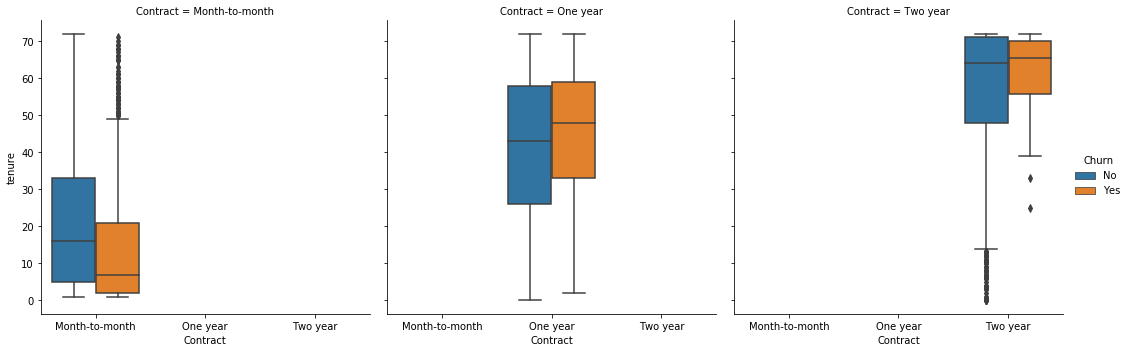

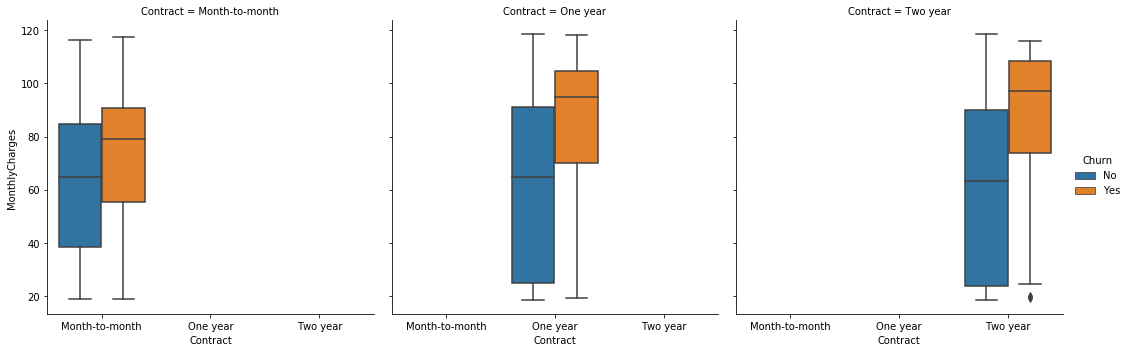

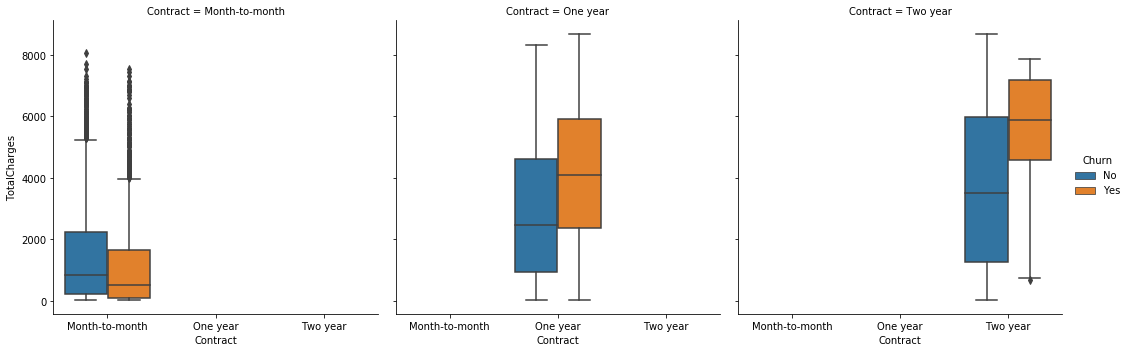

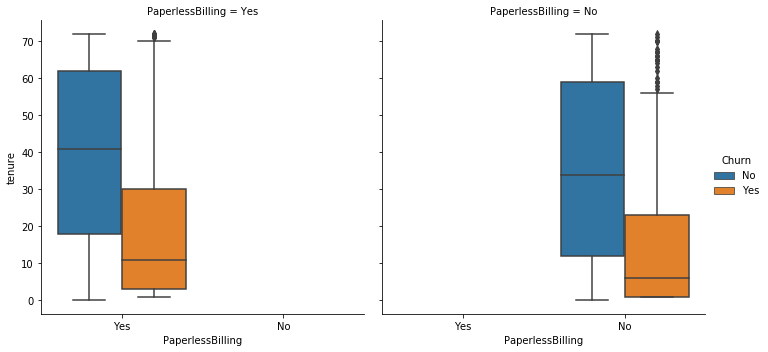

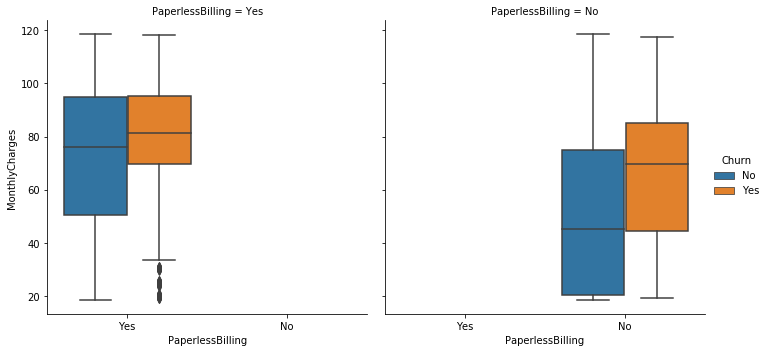

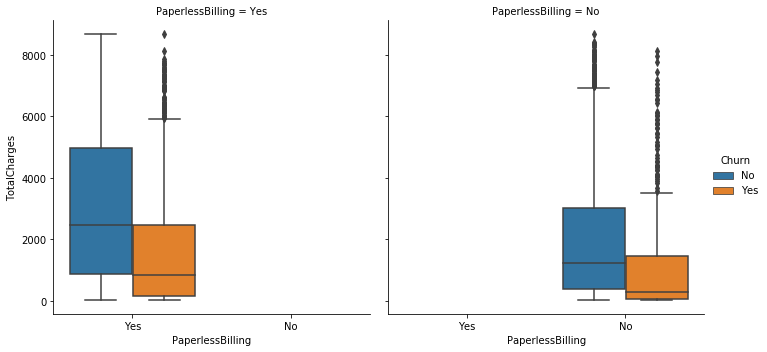

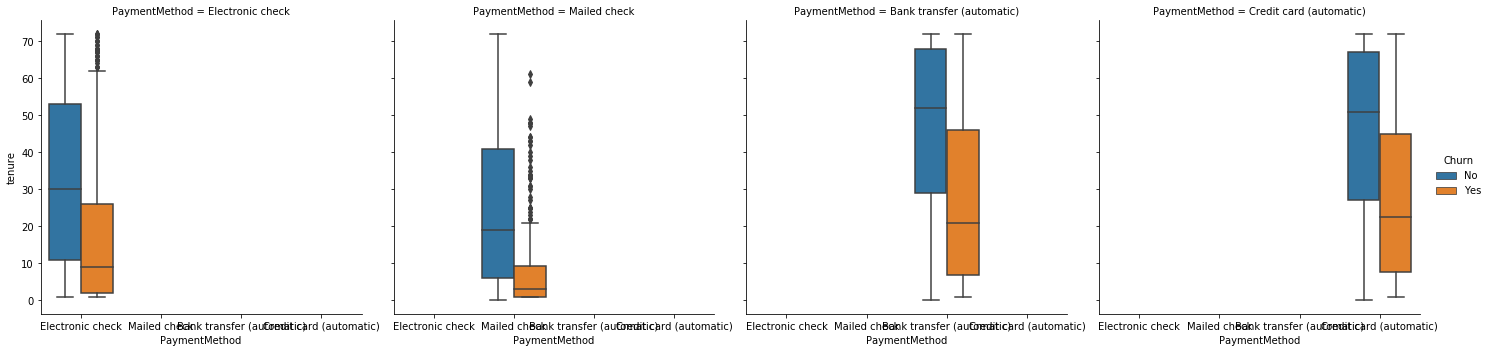

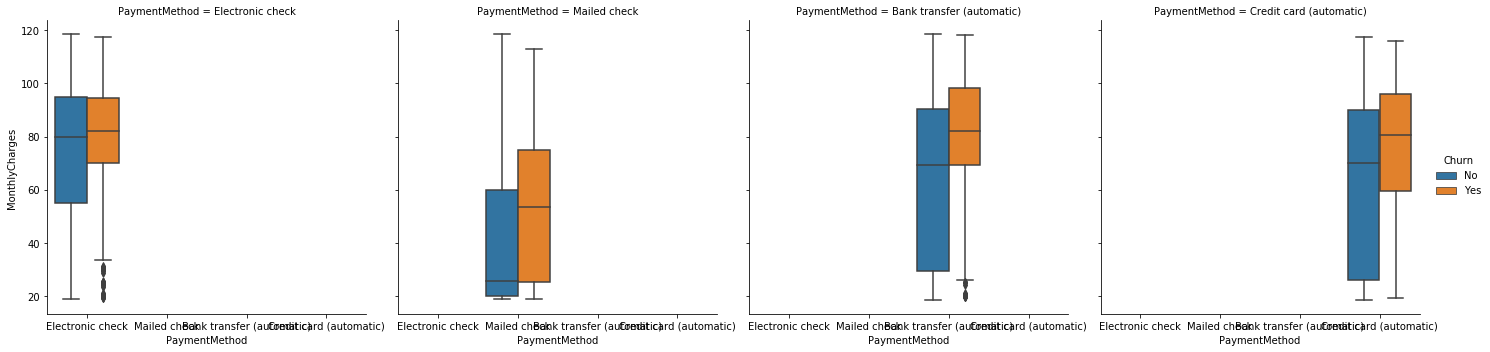

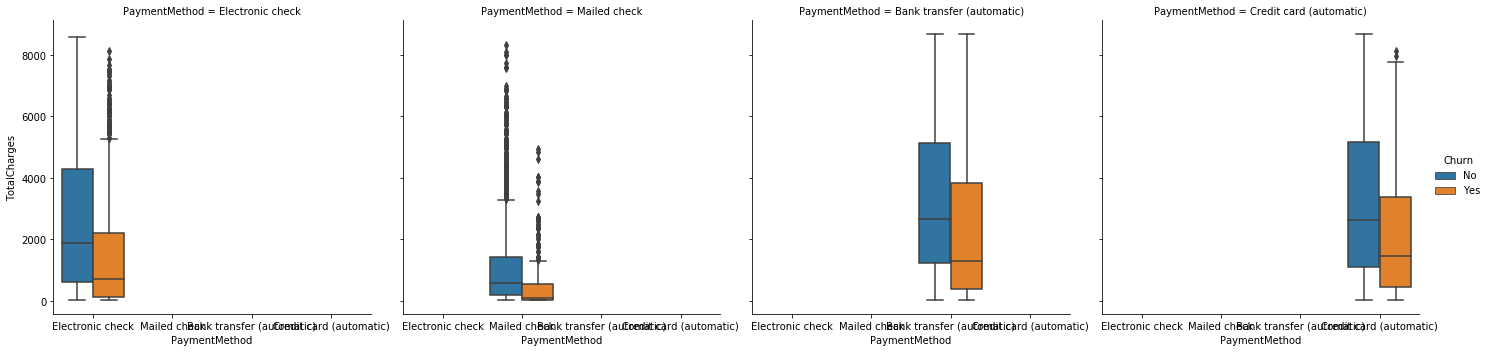

In [143]:
# Creating a loop to create boxplots for every combination of categorical and numerical variable, by Churn
for i in cat_cols:
    for j in range(0,len(num_cols)):
        sns.catplot(x=i, y=num_cols[j], hue="Churn",kind="box", col=i, data=telecom_data)
        #plt.title(i, y=1.3, fontsize = 16)


<a id='h2.5'></a>
## 2.5. Data Preprocessing

<a id='h2.5.1'></a>

### 2.5.1 Handling Categorical Features :  One hot encoding

Categorical data are variables that contain label values rather than numeric values. 
The number of possible values is often limited to a fixed set.

What is the Problem with Categorical Data?

Some algorithms can work with categorical data directly. However, not any machine learning algorithms can operate on label data directly.
They require all input variables and output variables to be numeric. This is where one hot encoding plays its important role.

A one hot encoding is a representation of categorical variables as binary vectors.
This first requires that the categorical values be mapped to integer values.
Then, each integer value is represented as a binary vector that is all zero values except the index of the integer, which is marked with a 1.

In general, this is mostly a constraint of the efficient implementation of machine learning algorithms rather than hard limitations on the algorithms themselves. 
This means that categorical data must be converted to a numerical form. 

If the 	categorical variable is an output variable, we could want to convert predictions by the model back into a categorical form in order to present them or use them in some application.

Note that for categorical variables where no ordinal relationship exists, the integer encoding used for ordinal avriables is not enough. 
In fact, using this encoding and allowing the model to assume a natural ordering between categories may result in poor performance or unexpected results.



#### Let's have a look at the categorical variables and their values

In [435]:
# Categorical variables : 1-hot encoding
# Now will check all categorical variables levels
telecom_data.dtypes=='object'
categorical_var=[i for i in telecom_data.columns if telecom_data[i].dtypes=='object']
for z in categorical_var:
    print(telecom_data[z].name,':',telecom_data[z].unique())

gender : ['Female' 'Male']
SeniorCitizen : ['No' 'Yes']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes']
OnlineBackup : ['Yes' 'No']
DeviceProtection : ['No' 'Yes']
TechSupport : ['No' 'Yes']
StreamingTV : ['No' 'Yes']
StreamingMovies : ['No' 'Yes']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


#### There are some variables has value 'No ... Service' that equivalent to 'No'. An example is the variable 'MultipleLines'. We Will turn the former in the latter value

In [436]:
#There are some variables has value 'No ... Service' that equivalent to 'No'.
# An example is the variable 'MultipleLines'. We Will turn the former in the latter value
Dual_features= ['OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']
for i in Dual_features:
    telecom_data[i]=telecom_data[i].apply(lambda x: 'No' if x=='No internet service' else x)
#Remove No Phones Service - equivilent to No for MultipleLines
telecom_data.MultipleLines=telecom_data.MultipleLines.apply(lambda x: 'No' if x=='No phone service' else x)
for z in [i for i in telecom_data.columns if telecom_data[i].dtypes=='object']:

    print(telecom_data[z].name,':',telecom_data[z].unique())

gender : ['Female' 'Male']
SeniorCitizen : ['No' 'Yes']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes']
OnlineBackup : ['Yes' 'No']
DeviceProtection : ['No' 'Yes']
TechSupport : ['No' 'Yes']
StreamingTV : ['No' 'Yes']
StreamingMovies : ['No' 'Yes']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


#### One hot encoding for variables with 2 classes

In [437]:
# IMPLEMENTING 1-HOT ENCODING:
# For logistics variables(2 classes) will encode using Label Encoder ;
# for Variables has more than 2 classes will use get_dummies function
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
for j in [i for i in telecom_data.columns if len(telecom_data[i].unique())==2]: # i.e. if unique values =2
    print(j, telecom_data[j].unique())
    telecom_data[j]= label_encoder.fit_transform(telecom_data[j])

gender ['Female' 'Male']
SeniorCitizen ['No' 'Yes']
Partner ['Yes' 'No']
Dependents ['No' 'Yes']
PhoneService ['No' 'Yes']
MultipleLines ['No' 'Yes']
OnlineSecurity ['No' 'Yes']
OnlineBackup ['Yes' 'No']
DeviceProtection ['No' 'Yes']
TechSupport ['No' 'Yes']
StreamingTV ['No' 'Yes']
StreamingMovies ['No' 'Yes']
PaperlessBilling ['Yes' 'No']
Churn ['No' 'Yes']


In [438]:
#Check Variables after first Encoding
[[j, telecom_data[j].unique()] for j in [i for i in telecom_data.columns if len(telecom_data[i].unique())<10]]

[['gender', array([0, 1], dtype=int64)],
 ['SeniorCitizen', array([0, 1], dtype=int64)],
 ['Partner', array([1, 0], dtype=int64)],
 ['Dependents', array([0, 1], dtype=int64)],
 ['PhoneService', array([0, 1], dtype=int64)],
 ['MultipleLines', array([0, 1], dtype=int64)],
 ['InternetService', array(['DSL', 'Fiber optic', 'No'], dtype=object)],
 ['OnlineSecurity', array([0, 1], dtype=int64)],
 ['OnlineBackup', array([1, 0], dtype=int64)],
 ['DeviceProtection', array([0, 1], dtype=int64)],
 ['TechSupport', array([0, 1], dtype=int64)],
 ['StreamingTV', array([0, 1], dtype=int64)],
 ['StreamingMovies', array([0, 1], dtype=int64)],
 ['Contract', array(['Month-to-month', 'One year', 'Two year'], dtype=object)],
 ['PaperlessBilling', array([1, 0], dtype=int64)],
 ['PaymentMethod',
  array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
         'Credit card (automatic)'], dtype=object)],
 ['Churn', array([0, 1], dtype=int64)]]

#### One hot encoding for variables with more than 2 classes

In [439]:
#Encode Variables with more than 2 Classes
telecom_data= pd.get_dummies(
    telecom_data, columns= [i for i in telecom_data.columns if telecom_data[i].dtypes=='object'],drop_first=True
)

In [440]:
#Check Variables after second Encoding
[[j, telecom_data[j].unique()] for j in [i for i in telecom_data.columns if len(telecom_data[i].unique())<10]] # we know "<10" includes all the columns..

[['gender', array([0, 1], dtype=int64)],
 ['SeniorCitizen', array([0, 1], dtype=int64)],
 ['Partner', array([1, 0], dtype=int64)],
 ['Dependents', array([0, 1], dtype=int64)],
 ['PhoneService', array([0, 1], dtype=int64)],
 ['MultipleLines', array([0, 1], dtype=int64)],
 ['OnlineSecurity', array([0, 1], dtype=int64)],
 ['OnlineBackup', array([1, 0], dtype=int64)],
 ['DeviceProtection', array([0, 1], dtype=int64)],
 ['TechSupport', array([0, 1], dtype=int64)],
 ['StreamingTV', array([0, 1], dtype=int64)],
 ['StreamingMovies', array([0, 1], dtype=int64)],
 ['PaperlessBilling', array([1, 0], dtype=int64)],
 ['Churn', array([0, 1], dtype=int64)],
 ['InternetService_Fiber optic', array([0, 1], dtype=uint64)],
 ['InternetService_No', array([0, 1], dtype=uint64)],
 ['Contract_One year', array([0, 1], dtype=uint64)],
 ['Contract_Two year', array([0, 1], dtype=uint64)],
 ['PaymentMethod_Credit card (automatic)', array([0, 1], dtype=uint64)],
 ['PaymentMethod_Electronic check', array([1, 0], dty

####  Simplifying variables' names after the encoding

In [441]:
# Simplifying variables' names after the encoding - to facilitate running logit regression with smg.logit:
telecom_data.columns=telecom_data.columns.str.replace(" ","")
telecom_data.columns=telecom_data.columns.str.replace("(","")
telecom_data.columns=telecom_data.columns.str.replace(")","")
display(telecom_data.columns)

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_Fiberoptic', 'InternetService_No', 'Contract_Oneyear',
       'Contract_Twoyear', 'PaymentMethod_Creditcardautomatic',
       'PaymentMethod_Electroniccheck', 'PaymentMethod_Mailedcheck'],
      dtype='object')

<a id='h2.5.2'></a>
### 2.5.3 Splitting the Data into Training, Validation and Test Data Sets

One of the very common issues while developing ML models is overfitting.

When you train your model, it tries its best to find out some kind of pattern in your training data while minimizing the error rate. But we only want our model to find pattern. Not more than that.
This because if your model just tries to go beyond finding patterns, it may memorize the training data. This is one of the reasons we need to use training and test set separation. 

After we have trained our model, we should test it on fresh examples so that we can avoid problems like overfitting. 
We can also estimate how well our model is performing given that it is facing new inputs. Based on the performance, we can proceed on developing our system further.

So, the test data set is nothing but the sample of data used to provide an unbiased evaluation of a final model fit on the training dataset.

The point is, good accuracy in training set can ensure nothing.

Thus, a more encouraged technique is to divide your data set into three classes: training set, validation set and test set. 

The validation set is used to evaluate a given model, but this is for frequent evaluation. Specifically, we can use this data to fine-tune the model hyperparameters. Hence the model occasionally sees this data, but never does it learn from this. We use the validation set results and update higher level hyperparameters. So the validation set in a way affects a model, but indirectly.

How to split the dataset into Train, Validation and Test sets mainly depends on 2 things. 
First, the total number of samples in your data and second, on the actual model you are training.

Some models need substantial data to train upon, so in this case you would optimize for the larger training sets. 
Models with very few hyperparameters will be easy to validate and tune, so one can probably reduce the size of the validation set, but if your model has many hyperparameters, you might want to have a large validation set as well (although cross validation might be considered as well). 

All in all,  the train-test-validation split ratio is also quite specific to your use case and it gets easier to make judgement as more and more models are trained and built.

#### It is good practice to shuffle the data prior to build the ML model

Unless we are dealing with time-ordered data, it is good practice to shuffle the data before splitting it into training, validation and test sets. 

This is a way to avoid working with sets of highly correlated examples.

Shuffling the data prior to any split helps to reduce the risk of unrepresentativeness of the validation and test data sets.
In an extreme case where delaing with data sorted in a certain order, splitting the data according to the row number in the data set would mean for the ML model to train to classify the targets based on data points that are rare or do not exist at all in the other sets - this effect woudl also depend on the variance in the data

In [442]:
print('Prior to shuffle : ')
telecom_data.head()

Prior to shuffle : 


gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0       0              0        1           0     1.0             0   
1       1              0        0           0    34.0             1   
2       1              0        0           0     2.0             1   
3       1              0        0           0    45.0             0   
4       0              0        0           0     2.0             1   

   MultipleLines  OnlineSecurity  OnlineBackup  DeviceProtection  \
0              0               0             1                 0   
1              0               1             0                 1   
2              0               1             1                 0   
3              0               1             0                 1   
4              0               0             0                 0   

             ...              MonthlyCharges  TotalCharges  Churn  \
0            ...                       29.85         29.85      0   
1            ...                       56.95       1889.50      0   
2            ...                       53.85        108.15      1   
3            ...                       42.30       1840.75      0   
4            ...                       70.70        151.65      1   

   InternetService_Fiberoptic  InternetService_No  Contract_Oneyear  \
0                           0                   0                 0   
1                           0                   0                 1   
2                           0                   0                 0   
3                           0                   0                 1   
4                           1                   0                 0   

   Contract_Twoyear  PaymentMethod_Creditcardautomatic  \
0                 0                                  0   
1                 0                                  0   
2                 0                                  0   
3                 0                                  0   
4                 0                                  0   

   PaymentMethod_Electroniccheck  PaymentMethod_Mailedcheck  
0                              1                          0  
1                              0                          1  
2                              0                          1  
3                              0                          0  
4                              1                          0  

[5 rows x 24 columns]

In [443]:
print('After shuffle : ')
telecom_data.sample(frac=1).head()

After shuffle : 


gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
2423       0              0        0           0    18.0             1   
5364       1              0        0           0    18.0             1   
6164       1              1        1           0    45.0             1   
2470       0              0        1           0    67.0             1   
6608       1              0        0           0    22.0             1   

      MultipleLines  OnlineSecurity  OnlineBackup  DeviceProtection  \
2423              0               0             0                 0   
5364              1               0             0                 1   
6164              1               1             0                 1   
2470              1               0             0                 0   
6608              0               0             1                 0   

                ...              MonthlyCharges  TotalCharges  Churn  \
2423            ...                       20.10        407.05      0   
5364            ...                       90.70       1597.25      1   
6164            ...                       75.15       3480.35      0   
2470            ...                       25.25       1733.15      0   
6608            ...                       55.15       1193.05      1   

      InternetService_Fiberoptic  InternetService_No  Contract_Oneyear  \
2423                           0                   1                 1   
5364                           1                   0                 0   
6164                           0                   0                 0   
2470                           0                   1                 0   
6608                           0                   0                 1   

      Contract_Twoyear  PaymentMethod_Creditcardautomatic  \
2423                 0                                  0   
5364                 0                                  1   
6164                 1                                  1   
2470                 1                                  1   
6608                 0                                  1   

      PaymentMethod_Electroniccheck  PaymentMethod_Mailedcheck  
2423                              0                          1  
5364                              0                          0  
6164                              0                          0  
2470                              0                          0  
6608                              0                          0  

[5 rows x 24 columns]

####  Separating Out Features from Targets

It is good practice to separate out features and targets, as this latter will be the dependent variable we are trying to handle and the former will be the data from which we will try to extract the function that best explains the value of the target variable.


In [444]:
# Features :
DATA=telecom_data#.drop('Churn',axis=1)
# Targets :
TARGETS=telecom_data['Churn']

<a id='h2.5.3'></a>

### 2.5.3 Normalising Training Data Prior to Split into Partial Training and Validation Data Sets

When numeric  x-data values are normalized, ML models are often more efficient, which leads to a better predicton. 

This because if numeric data is not normalized, and the magnitudes of the predictors are far apart, then a change in the value of a model's weight has far more relative influence on the xth value with larger magnitudes.

In other words, if the scales for different features are wildly different, this can have a knock-on effect on the ability of the ML algorithm to learn. Ensuring standardised feature values tackles this event to occur.

Below we normalise the data while splitting it into training, validation, and test sets, as per point 2.5.3.


In [445]:
# DATA SPLIT & NORMALISATION

#-------------------------------------------------------------------------------------------------------------
# Splitting the dataset into training and test
def trn_tst_spl(trn):
    global x_train
    x_train=DATA[:(int(round((np.shape(DATA)[0]*(trn)),0)))] # 3/4 of the data
    global y_train
    y_train=TARGETS[:(int(round((np.shape(DATA)[0]*(trn)),0)))] # 3/4 of the corresponding targets
    global x_test
    x_test=DATA[:(int(round((np.shape(DATA)[0]*(1-trn)),0)))] # 1/4 of the data
    global y_test
    y_test=TARGETS[:(int(round((np.shape(DATA)[0]*(1-trn)),0)))] # 1/4 of the corresponding targets
    
#-------------------------------------------------------------------------------------------------------------
def trn_val_tst_nrm(trn):
#-------------------------------------------------------------------------------------------------------------
    # Below : splitting the data into training and test Proceeding with standardisation

    trn_tst_spl((3/4)) # 1st: Application of the function defined above. we will split so that 3/4 of the data will be contained in the training set
#-------------------------------------------------------------------------------------------------------------
    # Proceeding with standardisation
    
    mean=x_train.mean(axis=0)
    std_dev=x_train.std(axis=0)
     # training set normalisation:
    global x_train_nrm
    x_train_nrm=x_train-mean # subtracting the mean for all the training variables
    x_train_nrm/=std_dev # dividing by the standard deviation 
    # test set normalisation
    global x_test_nrm
    x_test_nrm=x_test-mean # same for testing sets..
    x_test_nrm/=std_dev
#-------------------------------------------------------------------------------------------------------------    
    # generating normalised partial training and validation data sets from the training set (to perform validation before testing)
    # partial training data (i.e. what is left after the carve out to create the validation set below..)
    global partial_x_train_nrm 
    partial_x_train_nrm=x_train_nrm[:(int(round((np.shape(x_train_nrm)[0]*(trn)),0)))]
    # validation data:
    global val_x_train_nrm
    val_x_train_nrm=x_train_nrm[:(int(round((np.shape(x_train_nrm)[0]*(1-trn)),0)))]
    # partial training targets
    global partial_y_train_nrm
    partial_y_train_nrm=y_train[:(int(round((np.shape(x_train_nrm)[0]*(trn)),0)))]
    # validation targets
    global val_y_train_nrm
    val_y_train_nrm=y_train[:(int(round((np.shape(x_train_nrm)[0]*(1-trn)),0)))]


In [447]:
trn_val_tst_nrm(3/4) # insert here the fraction of the normalised traning data set to be the partial training set

#### Checking the distribution of targets in the training and test data sets for representativeness check

In [448]:
# Checking the distribution of targets in the training and test data sets for representativeness check
print(' % of churners in the training data set :\n'+
      str(np.sum(y_train)/len(y_train))+
      '\n'+'% of churners in the test data set: \n'+
      str(np.sum(y_test)/len(y_test)))

 % of churners in the training data set :
0.26164331692540704
% of churners in the test data set: 
0.2612152186257808


#### A look at the data after normalisation

In [219]:
x_train_nrm.head()

gender  SeniorCitizen   Partner  Dependents    tenure  PhoneService  \
0 -1.010946      -0.438814  1.036937   -0.649108 -1.272186     -3.126938   
1  0.988985      -0.438814 -0.964196   -0.649108  0.069028      0.319741   
2  0.988985      -0.438814 -0.964196   -0.649108 -1.231543      0.319741   
3  0.988985      -0.438814 -0.964196   -0.649108  0.516100     -3.126938   
4 -1.010946      -0.438814 -0.964196   -0.649108 -1.231543      0.319741   

   MultipleLines  OnlineSecurity  OnlineBackup  DeviceProtection  \
0      -0.864367       -0.634408      1.375610         -0.728334   
1      -0.864367        1.575975     -0.726813          1.372737   
2      -0.864367        1.575975      1.375610         -0.728334   
3      -0.864367        1.575975     -0.726813          1.372737   
4      -0.864367       -0.634408     -0.726813         -0.728334   

             ...              MonthlyCharges  TotalCharges     Churn  \
0            ...                   -1.161250     -0.992597 -0.595224   
1            ...                   -0.263065     -0.173142 -0.595224   
2            ...                   -0.365810     -0.958094  1.679721   
3            ...                   -0.748615     -0.194623 -0.595224   
4            ...                    0.192656     -0.938926  1.679721   

   InternetService_Fiberoptic  InternetService_No  Contract_Oneyear  \
0                   -0.886635           -0.528679         -0.512524   
1                   -0.886635           -0.528679          1.950761   
2                   -0.886635           -0.528679         -0.512524   
3                   -0.886635           -0.528679          1.950761   
4                    1.127647           -0.528679         -0.512524   

   Contract_Twoyear  PaymentMethod_Creditcardautomatic  \
0         -0.558784                          -0.528972   
1         -0.558784                          -0.528972   
2         -0.558784                          -0.528972   
3         -0.558784                          -0.528972   
4         -0.558784                          -0.528972   

   PaymentMethod_Electroniccheck  PaymentMethod_Mailedcheck  
0                       1.406086                  -0.541850  
1                      -0.711059                   1.845181  
2                      -0.711059                   1.845181  
3                      -0.711059                  -0.541850  
4                       1.406086                  -0.541850  

[5 rows x 24 columns]

In [220]:
x_test_nrm.tail()

gender  SeniorCitizen   Partner  Dependents    tenure  PhoneService  \
1756 -1.010946       2.278438 -0.964196   -0.649108  0.475457      0.319741   
1757  0.988985      -0.438814  1.036937    1.540284  0.881885      0.319741   
1758 -1.010946      -0.438814 -0.964196   -0.649108  1.450885      0.319741   
1759  0.988985      -0.438814 -0.964196   -0.649108 -0.499972      0.319741   
1760  0.988985      -0.438814  1.036937    1.540284  0.719314      0.319741   

      MultipleLines  OnlineSecurity  OnlineBackup  DeviceProtection  \
1756      -0.864367       -0.634408     -0.726813          1.372737   
1757      -0.864367       -0.634408      1.375610         -0.728334   
1758      -0.864367       -0.634408     -0.726813         -0.728334   
1759      -0.864367       -0.634408     -0.726813         -0.728334   
1760       1.156698       -0.634408     -0.726813          1.372737   

                ...              MonthlyCharges  TotalCharges     Churn  \
1756            ...                    0.330200      0.434317 -0.595224   
1757            ...                    0.499232      0.916389 -0.595224   
1758            ...                   -1.486055     -0.394612 -0.595224   
1759            ...                   -1.507598     -0.822704 -0.595224   
1760            ...                   -0.331009      0.146154 -0.595224   

      InternetService_Fiberoptic  InternetService_No  Contract_Oneyear  \
1756                   -0.886635           -0.528679          1.950761   
1757                    1.127647           -0.528679         -0.512524   
1758                   -0.886635            1.891149         -0.512524   
1759                   -0.886635            1.891149         -0.512524   
1760                   -0.886635           -0.528679          1.950761   

      Contract_Twoyear  PaymentMethod_Creditcardautomatic  \
1756         -0.558784                          -0.528972   
1757          1.789263                          -0.528972   
1758          1.789263                          -0.528972   
1759         -0.558784                          -0.528972   
1760         -0.558784                          -0.528972   

      PaymentMethod_Electroniccheck  PaymentMethod_Mailedcheck  
1756                      -0.711059                  -0.541850  
1757                      -0.711059                  -0.541850  
1758                      -0.711059                  -0.541850  
1759                      -0.711059                   1.845181  
1760                      -0.711059                  -0.541850  

[5 rows x 24 columns]

<a id='h2.5.4'></a>
### 2.5.4. Correlation Matrix of the data sets generated

In [449]:
# KP correlation matrix

def linear_correlation(input_data, colors):
    # Pearsons' correlation
    
    pearson=input_data.corr()
    pearson2=pearson.columns.tolist()
    kp_array = np.array(pearson)

    #Plotting
    matrix = go.Heatmap(z = kp_array,
                       x = input_data.corr().columns.tolist(),
                       y = input_data.corr().columns.tolist(),
                       colorscale = colors,
                       colorbar   = dict(title = "Coefficient of Linear Correlation", titleside = "right") ,)

    KP_lay = go.Layout(dict(
                            autosize = False,
                            height  = 720, width   = 800,
                            margin  = dict(r = 0 ,l = 210, t = 25,b = 210,),
                            yaxis   = dict(tickfont = dict(size = 9)),
                            xaxis   = dict(tickfont = dict(size = 9))))
    data = [matrix]
    variables_correlation_matrix = go.Figure(data=data,layout=KP_lay)
    # Plot:
    py.iplot(variables_correlation_matrix)

#### Linear Correlation in Training data

In [450]:
linear_correlation(x_train_nrm[num_cols], "Greens")

#### Linear Correlation in Test data

In [451]:
linear_correlation(x_test_nrm[num_cols], "Reds")

#### Linear Correlation in validation data

In [452]:
linear_correlation(val_x_train_nrm[num_cols], "Blues")

#### Linear Correlation in partial training set

In [453]:
linear_correlation(partial_x_train_nrm[num_cols], "Greys")

<a id='h3'></a>
# 3 Classification Models

<a id='h3.1'></a>
## 3.1 Logistic Regression


### Below we perform the first classification model : logistic regression. 
#### The approach will be to run the model on the normalised partial training set first, validate the performance of the normalised validation set, and ultimately deploy the model on the test set.
 In order to do so, we will first adjust the format of the data after the normalisation performed. We simply re-transofrm all the variables into categorical, turn tenure, MontlyCharges and TotaCharges into numeric. We do all this with the previusly create function 'type_converter'. 
 Then we turn the response variable into integer format, as required by the statsmodel library in Python. 

In [295]:
#------------------------------------------------
# Just creating copies of the data sets that will be used for logistic regression
#------------------------------------------------
logit_x_train_nrm=x_train_nrm.copy()
logit_partial_x_train_nrm=partial_x_train_nrm.copy()
logit_val_x_train_nrm=val_x_train_nrm.copy()
logit_x_test_nrm=x_test_nrm.copy()
#------------------------------------------------
# Converting the format as mentioned
#------------------------------------------------
type_converter(logit_x_train_nrm)
logit_x_train_nrm['Churn']=y_train
logit_x_train_nrm['Churn']=logit_x_train_nrm['Churn'].astype("int64")
#------------------------------------------------
type_converter(logit_partial_x_train_nrm)
logit_partial_x_train_nrm['Churn']=partial_y_train_nrm
logit_partial_x_train_nrm['Churn']=logit_partial_x_train_nrm['Churn'].astype("int64")
#------------------------------------------------
type_converter(logit_val_x_train_nrm)
logit_val_x_train_nrm['Churn']=val_y_train_nrm
logit_val_x_train_nrm['Churn']=logit_val_x_train_nrm['Churn'].astype("int64")
logit_val_y_train_nrm=logit_val_x_train_nrm['Churn']
#------------------------------------------------
type_converter(logit_x_test_nrm)
logit_x_test_nrm['Churn']=y_test
logit_x_test_nrm["Churn"] = logit_x_test_nrm["Churn"].astype("int64")
#------------------------------------------------
logit_x_train_nrm.info()
logit_partial_x_train_nrm.info()
logit_val_x_train_nrm.info()
logit_x_test_nrm.info()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning:

convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 24 columns):
gender                               5282 non-null object
SeniorCitizen                        5282 non-null object
Partner                              5282 non-null object
Dependents                           5282 non-null object
tenure                               5282 non-null float64
PhoneService                         5282 non-null object
MultipleLines                        5282 non-null object
OnlineSecurity                       5282 non-null object
OnlineBackup                         5282 non-null object
DeviceProtection                     5282 non-null object
TechSupport                          5282 non-null object
StreamingTV                          5282 non-null object
StreamingMovies                      5282 non-null object
PaperlessBilling                     5282 non-null object
MonthlyCharges                       5282 non-null float64
TotalCharges         

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1761 entries, 0 to 1760
Data columns (total 24 columns):
gender                               1761 non-null object
SeniorCitizen                        1761 non-null object
Partner                              1761 non-null object
Dependents                           1761 non-null object
tenure                               1761 non-null float64
PhoneService                         1761 non-null object
MultipleLines                        1761 non-null object
OnlineSecurity                       1761 non-null object
OnlineBackup                         1761 non-null object
DeviceProtection                     1761 non-null object
TechSupport                          1761 non-null object
StreamingTV                          1761 non-null object
StreamingMovies                      1761 non-null object
PaperlessBilling                     1761 non-null object
MonthlyCharges                       1761 non-null float64
TotalCharges         

<a id='h3.1.1'></a>
### 3.1.1. Model building

#### Firstly we create a list with the name of all the columns in the partial_x_train_nrm data set but the target

In [289]:
predictors = logit_partial_x_train_nrm.drop(['Churn'],axis=1,inplace=False)
predictors=list(predictors.columns) # "predictors" includes the name of all the columns but "Churn"

#### Then we run the logit regression model

In [285]:
# LOGIT REGRESSION MODEL
#categorical variables, if nunmerical can be included in the C()
# A variable will be interpreted as being categorical if it is enclosed in a C() expression in the formula (variables whose values are strings are automatically treated as categorical, but the NHANES categorical variables are all coded numerically).
# The “-” sign can be used to remove columns/variables. 

def logit_regression(features,data):
    
    global mlt_log_rgr
    mlt_log_rgr = smf.logit(
        formula = str(
            'Churn' + ' ~ ' + '+'.join(features)),
                data = data).fit(disp=0)
    
    print("================================================================")
    print("L O G I T    R E G R E S S I O N   M O D E L    S U M M A R Y")
    print("================================================================")
    display('COEFFICIENTS ESTIMATES :', mlt_log_rgr.params)
    print("================================================================")
    # AIC
    display('AKAIKE INFORMATION CRITERION :', mlt_log_rgr.aic)
    print("================================================================")
    # Pseudo R^2
    display('PSEUDO R-SQUARED :', mlt_log_rgr.prsquared)
    print("================================================================")
    # BIC
    display('BAYESIAN INFORMATION CRITERION', mlt_log_rgr.bic)
    print("================================================================")
    #  LogLik and the LRR p-value
    print('\nThe LogLik and LRR p-values are :\n'+str(mlt_log_rgr.llf)+' ; '+str(mlt_log_rgr.llr_pvalue))
    print("================================================================")
    # Coefficients' p-value
    print("Coefficients' p-values :\n"+str(round(mlt_log_rgr.pvalues,6)))
    print("================================================================")
    # Effects:
    #  What is coefficient for the baseline / constant effect? Is it significant?
    print('\nThe coefficient for the baseline is :'+
          str(mlt_log_rgr.params['Intercept'])+
          '\n As the associated p-value is '+
          str(mlt_log_rgr.pvalues['Intercept'])+
          '\nThe associated coefficient represents the estimated log odds of churning the telecom operator for the whole population of interest.'+
         'The odds are : '+str(np.exp(mlt_log_rgr.params['Intercept']))
         )
    print("================================================================")
    # FEATURES IMPORTANCE
    print("Odds Ratios")
    print("================================================================")
    odd_ratios=np.exp(mlt_log_rgr.params)
    display(odd_ratios)
    print("================================================================")


In [290]:
logit_regression(
    predictors,                 # features to include in the model
    logit_partial_x_train_nrm   # data
)

L O G I T    R E G R E S S I O N   M O D E L    S U M M A R Y


'COEFFICIENTS ESTIMATES :'

Intercept                                                 -5.079276
gender[T.0.9889853102798549]                              -0.001750
SeniorCitizen[T.2.278437971914835]                         0.159013
Partner[T.1.036937046372606]                               0.057336
Dependents[T.1.540284195013757]                           -0.142800
PhoneService[T.0.3197411411620847]                         1.466107
MultipleLines[T.1.1566976238646898]                        0.694767
OnlineSecurity[T.1.5759754303462097]                       0.114389
OnlineBackup[T.1.3756101309646802]                         0.307605
DeviceProtection[T.1.3727365360788621]                     0.363029
TechSupport[T.1.5759754303462097]                         -0.070921
StreamingTV[T.1.263547059195107]                           1.175556
StreamingMovies[T.1.2490210556886794]                      1.337805
PaperlessBilling[T.0.8310537104962793]                     0.301780
InternetService_Fiberoptic[T.1.1276467406456452]

'AKAIKE INFORMATION CRITERION :'

3230.652916117255

'PSEUDO R-SQUARED :'

0.30415461741962746

'BAYESIAN INFORMATION CRITERION'

3381.481017571459


The LogLik and LRR p-values are :
-1591.3264580586274 ; 4.935876392180313e-280
Coefficients' p-values :
Intercept                                                  0.003453
gender[T.0.9889853102798549]                               0.984125
SeniorCitizen[T.2.278437971914835]                         0.159877
Partner[T.1.036937046372606]                               0.590840
Dependents[T.1.540284195013757]                            0.241584
PhoneService[T.0.3197411411620847]                         0.095844
MultipleLines[T.1.1566976238646898]                        0.003691
OnlineSecurity[T.1.5759754303462097]                       0.637298
OnlineBackup[T.1.3756101309646802]                         0.195878
DeviceProtection[T.1.3727365360788621]                     0.127778
TechSupport[T.1.5759754303462097]                          0.771838
StreamingTV[T.1.263547059195107]                           0.007897
StreamingMovies[T.1.2490210556886794]                      0.002586
PaperlessBi

Intercept                                                   0.006224
gender[T.0.9889853102798549]                                0.998251
SeniorCitizen[T.2.278437971914835]                          1.172353
Partner[T.1.036937046372606]                                1.059011
Dependents[T.1.540284195013757]                             0.866928
PhoneService[T.0.3197411411620847]                          4.332334
MultipleLines[T.1.1566976238646898]                         2.003242
OnlineSecurity[T.1.5759754303462097]                        1.121188
OnlineBackup[T.1.3756101309646802]                          1.360164
DeviceProtection[T.1.3727365360788621]                      1.437678
TechSupport[T.1.5759754303462097]                           0.931536
StreamingTV[T.1.263547059195107]                            3.239944
StreamingMovies[T.1.2490210556886794]                       3.810672
PaperlessBilling[T.0.8310537104962793]                      1.352263
InternetService_Fiberoptic[T.1.127

<a id='h3.1.2'></a>
### 3.1.2. Model Validation and plotting the results

In [302]:
def logit_regression_deploy_plot(model, input_data,cutoff,input_target, plot, cm_colorscale, features):
    
    #-------- Calculate the probabilities
    # http://www.science.smith.edu/~jcrouser/SDS293/labs/2016/lab4/Lab%204%20-%20Logistic%20Regression%20in%20Python.pdf
    predictions = model.predict(input_data)
    print('Generated Probabilities of Churn - first 10 lines:\n\n'+str(predictions[0:10]))
    predictions_nominal = [ 0 if x < cutoff else 1 for x in predictions]
    
    #print(partial_x_train_nrm['Churn'])
    print('\nProbabibilies encoded in classes - first 10 values:\n\n'+str(predictions_nominal[0:10])+'\n')

    #--------- Generate Confusion Matrix
    from sklearn.metrics import confusion_matrix, classification_report 
    print('Precision and Recall:\n\n'+str(classification_report(input_target, predictions_nominal, digits=3)))
    confusion_matrix=confusion_matrix(input_data["Churn"], predictions_nominal)
    #print('Confusion Matrix :\n'+str(confusion_matrix))
    accuracy=(input_data["Churn"]==predictions_nominal).mean()
    print('Accuracy:\n\n'+str(round(accuracy,4)))
    
    #---------- Generate Area under the curve
    from sklearn.metrics import roc_auc_score,roc_curve,scorer
    model_roc_auc = roc_auc_score(input_data["Churn"],predictions) 
    #print ("\nArea under curve : ",model_roc_auc,"\n")
    fpr,tpr,thresholds = roc_curve(input_data["Churn"],predictions)

    if plot==True:
        #---------- Plot confusion matrix
        cnf_mtx = go.Heatmap(
            z = confusion_matrix ,
            x = ["Not churn","Churn"], y = ["Not churn","Churn"], showscale  = True, colorscale = cm_colorscale, name = "matrix")

        lay_conf = go.Layout(dict(title = "Confusion Matrix - accuracy: " + str(round(accuracy,4)),
                        autosize = True,
                        height  = 720,
                        width   = 800,
                        margin  = dict(r = 100 ,l = 150,
                                       t = 85,b = 250,
                                      ),
                        yaxis   = dict(tickfont = dict(size = 12), title='ACTUAL'),
                        xaxis   = dict(tickfont = dict(size = 12), title='PREDICTED'),
                       ))

        lay_roc = go.Layout(title = "Receiver Operating Characteristic", 
                           xaxis=dict(title='1-Specificity'),
                           yaxis=dict(title='Sensitivity'))


        #----------Plot roc curve
        # https://plot.ly/scikit-learn/plot-roc
        trace2 = go.Scatter(x = fpr,y = tpr,
                            name = "ROC curve(area=" + str(round(model_roc_auc,3))+")",
                            line = dict(color = ('darkorange'),width = 3))
        trace3 = go.Scatter(x = [0,1],y=[0,1],
                            name="Baseline",
                            line = dict(color = ('navy'),width = 2,
                            dash = 'dot'))

        figure2 = go.Figure(data=[trace2, trace3],layout=lay_roc)
        py.iplot(figure2)

        confusionmatrix = go.Figure(data=[cnf_mtx],layout=lay_conf)
        py.iplot(confusionmatrix)

        #----------Print Features impact on the response variable if logit regression
        model = smf.logit(
                formula = str(
                    'Churn' + ' ~ ' + '+'.join(features)),
                        data = input_data).fit(disp=0)
        print("========================================================================")
        print("Odds Ratios")
        print("========================================================================")
        odd_ratios=np.exp(model.params)
        display(odd_ratios)
        print("========================================================================")
    else:
        print(str(confusion_matrix))

In [400]:
logit_regression_deploy_plot(
    mlt_log_rgr,               # model
    logit_val_x_train_nrm,     # input_data
    0.5,                       # cutoff
    logit_val_y_train_nrm,     # input_target
    True,                      # 'True' if plot is wanted else 'False'
    "Reds",                    # cm_colorscale - colour of the confusion matrix
    predictors                 # features
)

Generated Probabilities of Churn - first 10 lines:

0    0.625449
1    0.029084
2    0.293043
3    0.015341
4    0.698232
5    0.787776
6    0.548514
7    0.288587
8    0.597732
9    0.009624
dtype: float64

Probabibilies encoded in classes - first 10 values:

[1, 0, 0, 0, 1, 1, 1, 0, 1, 0]

Precision and Recall:

             precision    recall  f1-score   support

          0      0.852     0.894     0.873       974
          1      0.654     0.564     0.606       346

avg / total      0.800     0.808     0.803      1320

Accuracy:

0.8076


Odds Ratios


Intercept                                                   0.012011
gender[T.0.9889853102798549]                                1.121302
SeniorCitizen[T.2.278437971914835]                          1.006492
Partner[T.1.036937046372606]                                1.121250
Dependents[T.1.540284195013757]                             0.700363
PhoneService[T.0.3197411411620847]                          3.024655
MultipleLines[T.1.1566976238646898]                         1.694134
OnlineSecurity[T.1.5759754303462097]                        0.887744
OnlineBackup[T.1.3756101309646802]                          1.480518
DeviceProtection[T.1.3727365360788621]                      1.842364
TechSupport[T.1.5759754303462097]                           0.668395
StreamingTV[T.1.263547059195107]                            2.510289
StreamingMovies[T.1.2490210556886794]                       3.743963
PaperlessBilling[T.0.8310537104962793]                      1.217344
InternetService_Fiberoptic[T.1.127

<a id='h3.1.3'></a>
### 3.1.3. Model Validation Results Interpretation

### At first glance the model returns a good classification accuracy : ~ 80%. However, as we are interested in the ability to predict customer churn, it is crucial to assess how well the model does at recognising the churn instances, rather than averaging out the performance across both churn and non churn outcomes.
 It turns out that only ~ 56 % of actual churners are detected using the model, which is a poor result.
 On the other hand, ~ 89% of the non churners are correctly classfied.
 Hence, one way to address this results would be to vary the probabilities cut-off value (at this first run fixed at 50%) in a  way that we gain accuracy in the predictions of the churn events, at the cost of some more errors in the predictions of the alternative event.
Let's see how much we gain from doing so


<a id='h3.1.4'></a>
### 3.1.4. Model Validation Results - Searching for the optimal  probability cut-off value

#### cut-off value = 40%

In [304]:
logit_regression_deploy_plot(
    mlt_log_rgr,               # model
    logit_val_x_train_nrm,     # input_data
    0.4,                       # cutoff
    logit_val_y_train_nrm,     # input_target
    False,                     # 'True' if plot is wanted else 'False'
    "Reds",                    # cm_colorscale - colour of the confusion matrix
    predictors                 # features
)

Generated Probabilities of Churn - first 10 lines:

0    0.632553
1    0.032336
2    0.316149
3    0.017195
4    0.689054
5    0.780500
6    0.474435
7    0.308791
8    0.577339
9    0.010180
dtype: float64

Probabibilies encoded in classes - first 10 values:

[1, 0, 0, 0, 1, 1, 1, 0, 1, 0]

Precision and Recall:

             precision    recall  f1-score   support

          0      0.882     0.839     0.860       974
          1      0.602     0.685     0.641       346

avg / total      0.809     0.798     0.802      1320

Accuracy:

0.7985
[[817 157]
 [109 237]]


#### cut-off value = 30%

In [305]:
logit_regression_deploy_plot(
    mlt_log_rgr,               # model
    logit_val_x_train_nrm,     # input_data
    0.3,                       # cutoff
    logit_val_y_train_nrm,     # input_target
    False,                     # 'True' if plot is wanted else 'False'
    "Reds",                    # cm_colorscale - colour of the confusion matrix
    predictors                 # features
)

Generated Probabilities of Churn - first 10 lines:

0    0.632553
1    0.032336
2    0.316149
3    0.017195
4    0.689054
5    0.780500
6    0.474435
7    0.308791
8    0.577339
9    0.010180
dtype: float64

Probabibilies encoded in classes - first 10 values:

[1, 0, 1, 0, 1, 1, 1, 1, 1, 0]

Precision and Recall:

             precision    recall  f1-score   support

          0      0.921     0.756     0.830       974
          1      0.543     0.818     0.653       346

avg / total      0.822     0.772     0.784      1320

Accuracy:

0.772
[[736 238]
 [ 63 283]]


### Commentary
#### Using a lower cutoff value on the probabilities generated leads to a deterioration of the overall accuracy.
 The 40% cutoff value helps reach 68% accuracy on the classification of the churn events. This is clearly a good improvement with respect to the 56% obtained with 50% cutoff value. However, it is certainly not an exciting result, and it comes at the cost of a deterioration of the non-churn events by ~ 10 percentage points.
 With the 30% cutoff value we reach a 81% accuracy. This begins to look satisfactory, however the % of correctly classified non churners drops to 75%.
#### Ultimately the choice of the cutoff value depends on the specific needs and targets of the telecom company.
 However, 68% accuracy reached with the 40% cutoff value might be the minimum threshold to justify the usage of any model to predict churn rather than randomly guessing. We will then use this as baseline model when doing comparisons with other models developed.

<a id='h3.1.5'></a>
### 3.1.5. Performing Feature Selection to enhance the model

 In this section we will try to understand whether the performance of the model can be boosted by selecting some of the features included in the data set. 
 
 More specifically, we will perform backward features selection based on the p-value of the coefficients generated by the logit regression model. The p-value returns the likelihood that the coefficient generated for a certain predictor is zero (or better, is extracted from a population where the mean is zero : x-M/SE), in which case the variable under analysis doesn't give a statistically significant contribution to the explaination of the response variable. Hence, assuming that we are working with 95% confidence level, we tend to remove from the set of features used in the model the ones for which the p-value is > 5%. 
 
 We will do so, starting from having all the variables in the model (as we have done so far) and eliminating the feature with the highest p-value and re-running the model. We will repeat this as many times as the number of runs necessary to end up with only significant features in the set of variables used to build the model - from here the name 'backward selection'. Let's see what the result looks like. 

<a id='h3.1.5.1'></a>
### 3.1.5.1. Backward Features Selection (p-values)

In [307]:
# BACKWARD FEATURES SELECTION BASED ON p-value:

def backward_feature_selection(data):
    
    global bcw_ftr_sel
    bcw_ftr_sel=[]
    predictors = data.drop(['Churn'],axis=1,inplace=False)
    for row in predictors:
        bcw_ftr_sel.append(row)
    print('==========================================================================================================================\n'+
          str(len(bcw_ftr_sel))+
          ' features found.'+
          '\nStarting list of features:'+
          str(bcw_ftr_sel)+'\n')
    i=1
    Finished=False
    while not Finished:
        for i in range(1,(len(bcw_ftr_sel)-1)): # if only 1 variable is left, there feature selection doesn't change the model
            print('---- B A C K W A R D   F E A T U R E S  S E L E C T I O N  (p-value, alpha=0.05) ----')
            # model
            f = 'Churn' + ' ~ ' + '+'.join(bcw_ftr_sel)
            reg = smf.logit(formula = str(f), data = data).fit(disp=0)
            # metrics
            print('\nLOGIT REGRESSION MODEL METRICS:\n')
            print('pseudo R-squared: '+str(reg.prsquared)+'\nAkaike Information Criterion: '+str(reg.aic)+'\nBayesian Information Criterion: '+str(reg.bic))
            print('llr_pvalue : '+str(reg.llr_pvalue))
            print('llf : '+str(reg.llf))
            print('\np-values : \n'+str(round(reg.pvalues,6)))
            # highest p-value
            pred= reg.pvalues.argmax()
            score = reg.pvalues[pred]
            pred_spt=format((reg.pvalues.argmax().split('[')[0])) # to extract the name as in the initial list (it comes with squared brackets)
            print('\nFeature with highest p-value: '+str(pred_spt))
            # remove variable with highest p-value if not significant with 95% confidence level (alpha=.05)
            if score > 0.05:
                bcw_ftr_sel.remove(pred_spt)
                print('H0 is accepted with 95% CI : the feature is not statistically significant')
            else:
            # other wise, there is no need to drop the variable from the list of features:
                bcw_ftr_sel=bcw_ftr_sel
                break
            print('\nUpdated features list:'+str(bcw_ftr_sel)+'\n==========================================================================================================================\n')
            i=i+1
        Finished=True
    print('\nBackward Feature selection is over. The best set of features is :'+
          str(bcw_ftr_sel)+
          '\n'+
          'The new pseudo R-squared is : '+str(reg.prsquared)+
          '\nAkaike Information Criterion:'+str(reg.aic)+
          '\nBayesian Information Criterion:'+str(reg.bic)+
          '\nThe number of variables after selection is :' + str(len(bcw_ftr_sel)))


In [308]:
backward_feature_selection(logit_partial_x_train_nrm)

23 features found.
Starting list of features:['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'InternetService_Fiberoptic', 'InternetService_No', 'Contract_Oneyear', 'Contract_Twoyear', 'PaymentMethod_Creditcardautomatic', 'PaymentMethod_Electroniccheck', 'PaymentMethod_Mailedcheck']

---- B A C K W A R D   F E A T U R E S  S E L E C T I O N  (p-value, alpha=0.05) ----

LOGIT REGRESSION MODEL METRICS:

pseudo R-squared: 0.30415461741962746
Akaike Information Criterion: 3230.652916117255
Bayesian Information Criterion: 3381.481017571459
llr_pvalue : 4.935876392180313e-280
llf : -1591.3264580586274

p-values : 
Intercept                                                  0.003453
gender[T.0.9889853102798549]                               0.984125
SeniorCitizen[T.2.278437971914835]         

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: FutureWarning:

'argmax' is deprecated, use 'idxmax' instead. The behavior of 'argmax'
will be corrected to return the positional maximum in the future.
Use 'series.values.argmax' to get the position of the maximum now.

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:32: FutureWarning:

'argmax' is deprecated, use 'idxmax' instead. The behavior of 'argmax'
will be corrected to return the positional maximum in the future.
Use 'series.values.argmax' to get the position of the maximum now.




LOGIT REGRESSION MODEL METRICS:

pseudo R-squared: 0.3041545308551441
Akaike Information Criterion: 3228.653312045305
Bayesian Information Criterion: 3373.1969092722507
llr_pvalue : 6.133735362373092e-281
llf : -1591.3266560226525

p-values : 
Intercept                                                  0.003395
SeniorCitizen[T.2.278437971914835]                         0.159894
Partner[T.1.036937046372606]                               0.590944
Dependents[T.1.540284195013757]                            0.241645
PhoneService[T.0.3197411411620847]                         0.095684
MultipleLines[T.1.1566976238646898]                        0.003681
OnlineSecurity[T.1.5759754303462097]                       0.635961
OnlineBackup[T.1.3756101309646802]                         0.195365
DeviceProtection[T.1.3727365360788621]                     0.127490
TechSupport[T.1.5759754303462097]                          0.772194
StreamingTV[T.1.263547059195107]                           0.007866
Streami


LOGIT REGRESSION MODEL METRICS:

pseudo R-squared: 0.303726438388655
Akaike Information Criterion: 3222.611318480279
Bayesian Information Criterion: 3342.01689879819
llr_pvalue : 2.9944145196061247e-284
llf : -1592.3056592401394

p-values : 
Intercept                                                  0.000000
SeniorCitizen[T.2.278437971914835]                         0.099611
PhoneService[T.0.3197411411620847]                         0.000174
MultipleLines[T.1.1566976238646898]                        0.000000
OnlineSecurity[T.1.5759754303462097]                       0.285935
OnlineBackup[T.1.3756101309646802]                         0.013036
DeviceProtection[T.1.3727365360788621]                     0.005090
StreamingTV[T.1.263547059195107]                           0.000000
StreamingMovies[T.1.2490210556886794]                      0.000000
PaperlessBilling[T.0.8310537104962793]                     0.002212
InternetService_Fiberoptic[T.1.1276467406456452]           0.000000
InternetS

#### Below is the set of features as a result of the backward selection method performed. 8 features have been dropped, and none of the variables in the new set has a p-value > 5%. The pseudo r-squared seems to be slightly lower than the one seen in the model run with all the variables. Nevertheless, AIC and BIC statistics seem to be slghtly lower  - which is a positive sign. Let's see how this model performs on validation : we will run the model with 30, 40 and 50 percent cutoff as we did earlier

In [321]:
for i in range(3,5,1):
    
    print('\n\ncutoff value : '+str(round((i/10),2))+'\n\n')
    #---------------------------------------------------------------------
    # Model training:
    logit_regression(
        bcw_ftr_sel,                # features to include in the model
        logit_partial_x_train_nrm   # data
    ) 
    #----------------------------------------------------------------------
    # Model validation:
    logit_regression_deploy_plot(
        mlt_log_rgr,                # model
        logit_val_x_train_nrm,      # input_data
        i/10,                          # cutoff
        logit_val_y_train_nrm,      # input_target
        False,                      # 'True' if plot is wanted else 'False'
        "Reds",                     # cm_colorscale - colour of the confusion matrix
        bcw_ftr_sel                 # features
    )



cutoff value : 0.3


L O G I T    R E G R E S S I O N   M O D E L    S U M M A R Y


'COEFFICIENTS ESTIMATES :'

Intercept                                             -5.076197
PhoneService[T.0.3197411411620847]                     1.411149
MultipleLines[T.1.1566976238646898]                    0.689839
OnlineBackup[T.1.3756101309646802]                     0.295598
DeviceProtection[T.1.3727365360788621]                 0.352065
StreamingTV[T.1.263547059195107]                       1.143499
StreamingMovies[T.1.2490210556886794]                  1.318401
PaperlessBilling[T.0.8310537104962793]                 0.307976
InternetService_Fiberoptic[T.1.1276467406456452]       3.335844
InternetService_No[T.1.8911493387248552]              -3.500232
Contract_Oneyear[T.1.9507605817345641]                -0.732257
Contract_Twoyear[T.1.789263031011333]                 -1.857250
PaymentMethod_Electroniccheck[T.1.4060859540051305]    0.357388
tenure                                                -1.559588
MonthlyCharges                                        -3.035283
TotalCharges                            

'AKAIKE INFORMATION CRITERION :'

3222.1927157893233

'PSEUDO R-SQUARED :'

0.302506138956638

'BAYESIAN INFORMATION CRITERION'

3322.7447834254594


The LogLik and LRR p-values are :
-1595.0963578946617 ; 5.582085209463123e-286
Coefficients' p-values :
Intercept                                              0.000000
PhoneService[T.0.3197411411620847]                     0.000066
MultipleLines[T.1.1566976238646898]                    0.000000
OnlineBackup[T.1.3756101309646802]                     0.020651
DeviceProtection[T.1.3727365360788621]                 0.006815
StreamingTV[T.1.263547059195107]                       0.000000
StreamingMovies[T.1.2490210556886794]                  0.000000
PaperlessBilling[T.0.8310537104962793]                 0.002207
InternetService_Fiberoptic[T.1.1276467406456452]       0.000000
InternetService_No[T.1.8911493387248552]               0.000000
Contract_Oneyear[T.1.9507605817345641]                 0.000000
Contract_Twoyear[T.1.789263031011333]                  0.000000
PaymentMethod_Electroniccheck[T.1.4060859540051305]    0.000102
tenure                                                 0.000000

Intercept                                               0.006244
PhoneService[T.0.3197411411620847]                      4.100666
MultipleLines[T.1.1566976238646898]                     1.993396
OnlineBackup[T.1.3756101309646802]                      1.343930
DeviceProtection[T.1.3727365360788621]                  1.422000
StreamingTV[T.1.263547059195107]                        3.137729
StreamingMovies[T.1.2490210556886794]                   3.737442
PaperlessBilling[T.0.8310537104962793]                  1.360669
InternetService_Fiberoptic[T.1.1276467406456452]       28.102090
InternetService_No[T.1.8911493387248552]                0.030190
Contract_Oneyear[T.1.9507605817345641]                  0.480823
Contract_Twoyear[T.1.789263031011333]                   0.156101
PaymentMethod_Electroniccheck[T.1.4060859540051305]     1.429591
tenure                                                  0.210223
MonthlyCharges                                          0.048061
TotalCharges             

Generated Probabilities of Churn - first 10 lines:

0    0.625449
1    0.029084
2    0.293043
3    0.015341
4    0.698232
5    0.787776
6    0.548514
7    0.288587
8    0.597732
9    0.009624
dtype: float64

Probabibilies encoded in classes - first 10 values:

[1, 0, 0, 0, 1, 1, 1, 0, 1, 0]

Precision and Recall:

             precision    recall  f1-score   support

          0      0.913     0.757     0.828       974
          1      0.538     0.798     0.643       346

avg / total      0.815     0.767     0.779      1320

Accuracy:

0.7674
[[737 237]
 [ 70 276]]


cutoff value : 0.4


L O G I T    R E G R E S S I O N   M O D E L    S U M M A R Y


'COEFFICIENTS ESTIMATES :'

Intercept                                             -5.076197
PhoneService[T.0.3197411411620847]                     1.411149
MultipleLines[T.1.1566976238646898]                    0.689839
OnlineBackup[T.1.3756101309646802]                     0.295598
DeviceProtection[T.1.3727365360788621]                 0.352065
StreamingTV[T.1.263547059195107]                       1.143499
StreamingMovies[T.1.2490210556886794]                  1.318401
PaperlessBilling[T.0.8310537104962793]                 0.307976
InternetService_Fiberoptic[T.1.1276467406456452]       3.335844
InternetService_No[T.1.8911493387248552]              -3.500232
Contract_Oneyear[T.1.9507605817345641]                -0.732257
Contract_Twoyear[T.1.789263031011333]                 -1.857250
PaymentMethod_Electroniccheck[T.1.4060859540051305]    0.357388
tenure                                                -1.559588
MonthlyCharges                                        -3.035283
TotalCharges                            

'AKAIKE INFORMATION CRITERION :'

3222.1927157893233

'PSEUDO R-SQUARED :'

0.302506138956638

'BAYESIAN INFORMATION CRITERION'

3322.7447834254594


The LogLik and LRR p-values are :
-1595.0963578946617 ; 5.582085209463123e-286
Coefficients' p-values :
Intercept                                              0.000000
PhoneService[T.0.3197411411620847]                     0.000066
MultipleLines[T.1.1566976238646898]                    0.000000
OnlineBackup[T.1.3756101309646802]                     0.020651
DeviceProtection[T.1.3727365360788621]                 0.006815
StreamingTV[T.1.263547059195107]                       0.000000
StreamingMovies[T.1.2490210556886794]                  0.000000
PaperlessBilling[T.0.8310537104962793]                 0.002207
InternetService_Fiberoptic[T.1.1276467406456452]       0.000000
InternetService_No[T.1.8911493387248552]               0.000000
Contract_Oneyear[T.1.9507605817345641]                 0.000000
Contract_Twoyear[T.1.789263031011333]                  0.000000
PaymentMethod_Electroniccheck[T.1.4060859540051305]    0.000102
tenure                                                 0.000000

Intercept                                               0.006244
PhoneService[T.0.3197411411620847]                      4.100666
MultipleLines[T.1.1566976238646898]                     1.993396
OnlineBackup[T.1.3756101309646802]                      1.343930
DeviceProtection[T.1.3727365360788621]                  1.422000
StreamingTV[T.1.263547059195107]                        3.137729
StreamingMovies[T.1.2490210556886794]                   3.737442
PaperlessBilling[T.0.8310537104962793]                  1.360669
InternetService_Fiberoptic[T.1.1276467406456452]       28.102090
InternetService_No[T.1.8911493387248552]                0.030190
Contract_Oneyear[T.1.9507605817345641]                  0.480823
Contract_Twoyear[T.1.789263031011333]                   0.156101
PaymentMethod_Electroniccheck[T.1.4060859540051305]     1.429591
tenure                                                  0.210223
MonthlyCharges                                          0.048061
TotalCharges             

Generated Probabilities of Churn - first 10 lines:

0    0.625449
1    0.029084
2    0.293043
3    0.015341
4    0.698232
5    0.787776
6    0.548514
7    0.288587
8    0.597732
9    0.009624
dtype: float64

Probabibilies encoded in classes - first 10 values:

[1, 0, 0, 0, 1, 1, 1, 0, 1, 0]

Precision and Recall:

             precision    recall  f1-score   support

          0      0.884     0.835     0.859       974
          1      0.598     0.691     0.641       346

avg / total      0.809     0.797     0.801      1320

Accuracy:

0.797
[[813 161]
 [107 239]]


<a id='h3.1.5.2'></a>
### 3.1.5.2. Model Validation Results (Forward Selection)

 The results are quite disappointing : the KPIs haven't varied much. With respect to the accuracy at predicting churn events, this model does a bit better with 40% cutoff probability value, and slightly worse with 30% cutoff.
 As the predictive power of the model seems to be very similar, we will go on to test this model with a smaller number of features, guided by the principle that a more simple model is preferred to a more complex one when these yield very similar results. 40% cutoff value will be applied

<a id='h3.1.6'></a>
### 3.1.6. Testing the logstic regression model

In [401]:
#---------------------------------------------------------------------
# Model training:
logit_regression(
    bcw_ftr_sel,                # features to include in the model
    logit_partial_x_train_nrm   # data
) 
#----------------------------------------------------------------------
# Model validation:
logit_regression_deploy_plot(
    mlt_log_rgr,                # model
    logit_x_test_nrm,           # input_data
    0.4,                        # cutoff
    y_test,                     # input_target
    True,                       # 'True' if plot is wanted else 'False'
    "Reds",                    # cm_colorscale - colour of the confusion matrix
    bcw_ftr_sel                 # features
)

L O G I T    R E G R E S S I O N   M O D E L    S U M M A R Y


'COEFFICIENTS ESTIMATES :'

Intercept                                             -5.076197
PhoneService[T.0.3197411411620847]                     1.411149
MultipleLines[T.1.1566976238646898]                    0.689839
OnlineBackup[T.1.3756101309646802]                     0.295598
DeviceProtection[T.1.3727365360788621]                 0.352065
StreamingTV[T.1.263547059195107]                       1.143499
StreamingMovies[T.1.2490210556886794]                  1.318401
PaperlessBilling[T.0.8310537104962793]                 0.307976
InternetService_Fiberoptic[T.1.1276467406456452]       3.335844
InternetService_No[T.1.8911493387248552]              -3.500232
Contract_Oneyear[T.1.9507605817345641]                -0.732257
Contract_Twoyear[T.1.789263031011333]                 -1.857250
PaymentMethod_Electroniccheck[T.1.4060859540051305]    0.357388
tenure                                                -1.559588
MonthlyCharges                                        -3.035283
TotalCharges                            

'AKAIKE INFORMATION CRITERION :'

3222.1927157893233

'PSEUDO R-SQUARED :'

0.302506138956638

'BAYESIAN INFORMATION CRITERION'

3322.7447834254594


The LogLik and LRR p-values are :
-1595.0963578946617 ; 5.582085209463123e-286
Coefficients' p-values :
Intercept                                              0.000000
PhoneService[T.0.3197411411620847]                     0.000066
MultipleLines[T.1.1566976238646898]                    0.000000
OnlineBackup[T.1.3756101309646802]                     0.020651
DeviceProtection[T.1.3727365360788621]                 0.006815
StreamingTV[T.1.263547059195107]                       0.000000
StreamingMovies[T.1.2490210556886794]                  0.000000
PaperlessBilling[T.0.8310537104962793]                 0.002207
InternetService_Fiberoptic[T.1.1276467406456452]       0.000000
InternetService_No[T.1.8911493387248552]               0.000000
Contract_Oneyear[T.1.9507605817345641]                 0.000000
Contract_Twoyear[T.1.789263031011333]                  0.000000
PaymentMethod_Electroniccheck[T.1.4060859540051305]    0.000102
tenure                                                 0.000000

Intercept                                               0.006244
PhoneService[T.0.3197411411620847]                      4.100666
MultipleLines[T.1.1566976238646898]                     1.993396
OnlineBackup[T.1.3756101309646802]                      1.343930
DeviceProtection[T.1.3727365360788621]                  1.422000
StreamingTV[T.1.263547059195107]                        3.137729
StreamingMovies[T.1.2490210556886794]                   3.737442
PaperlessBilling[T.0.8310537104962793]                  1.360669
InternetService_Fiberoptic[T.1.1276467406456452]       28.102090
InternetService_No[T.1.8911493387248552]                0.030190
Contract_Oneyear[T.1.9507605817345641]                  0.480823
Contract_Twoyear[T.1.789263031011333]                   0.156101
PaymentMethod_Electroniccheck[T.1.4060859540051305]     1.429591
tenure                                                  0.210223
MonthlyCharges                                          0.048061
TotalCharges             

Generated Probabilities of Churn - first 10 lines:

0    0.625449
1    0.029084
2    0.293043
3    0.015341
4    0.698232
5    0.787776
6    0.548514
7    0.288587
8    0.597732
9    0.009624
dtype: float64

Probabibilies encoded in classes - first 10 values:

[1, 0, 0, 0, 1, 1, 1, 0, 1, 0]

Precision and Recall:

             precision    recall  f1-score   support

          0      0.888     0.841     0.864      1301
          1      0.609     0.700     0.651       460

avg / total      0.815     0.804     0.808      1761

Accuracy:

0.8041


Odds Ratios


Intercept                                               0.001114
PhoneService[T.0.3197411411620847]                      8.658716
MultipleLines[T.1.1566976238646898]                     2.382403
OnlineBackup[T.1.3756101309646802]                      1.678311
DeviceProtection[T.1.3727365360788621]                  2.080426
StreamingTV[T.1.263547059195107]                        4.513449
StreamingMovies[T.1.2490210556886794]                   6.307820
PaperlessBilling[T.0.8310537104962793]                  1.347262
InternetService_Fiberoptic[T.1.1276467406456452]       79.764956
InternetService_No[T.1.8911493387248552]                0.012064
Contract_Oneyear[T.1.9507605817345641]                  0.499488
Contract_Twoyear[T.1.789263031011333]                   0.105734
PaymentMethod_Electroniccheck[T.1.4060859540051305]     1.531367
tenure                                                  0.155089
MonthlyCharges                                          0.013924
TotalCharges             

### The accuracy reached is about 70% on churners classification and 84% on the alternative event - slighly better than the validation.


<a id='h3.1.7'></a>
### 3.1.7. Features Coefficients Interpretation

### The odds generated with the logit regression model gives us a view of the features' impact on the odds of the churn event happening. 
 Interestingly, the major element of impact over the odds of a customer churning is having a service of internet fiberoptic. The alternative is either having a DSL service or not having an internet contract at all, which seem, churn wise, to be much more successful. This is in line with the high impact on churn of having Streaming movies and streaming TV - probably associated with the fiber optic service. This was also inferable from the charts plotted in the data visualisation section, where the fraction of churners using fiber optic internet service and streaming TV/Movies is clearly higher for the churners than for the non churners. - see section 'Data Visualisation' above. 

 Additionally, having a phone service contract seems to be another element that significantly contribues to the churn, together with the increase of charge of the customers. Being on a Month-to-Month contract and having lowe tenure has, as predictable, a negative impact on the probability of the customer not churning, as opposed to having a 1-year or 2-year contract and having longer tenure as a customer. 

 All in all, it seems that either the fiber optic internet service does not work very well, or that customers perceive that it is not good value for money or that they can sign better offers else where. Users having Streaming services are in fact more likely to have a fiber optic contract as well. This could additionally be related to the higher charge that would most probably affect users with multiple contracts, including the fiber optic internet service, which is usually relatively expensive. Furthermore, trying to promote long term contracts as opposed to prepaid (month-to-month) contracts seems to be a good strategy.

<a id='h4'></a>

# 4. EVALUATION

<a id='h4.1'></a>
## 4.1 Conclusions

Predicting customer behaviour is a frequently practiced exercise across businesess operating in numerous industries, not least the telecom industry, where churn predictions play a key role.

We have been trying to build a machine learning model able to effectively address this problem, classifiable as binary classification.

The data used to perform the analysis have undergone heavy manipulation before being ready to be processed. 

The logistic regression model built has returned moderately satisfactory results. 

Despite the overall high classification accuracy achieved, the first model run hasn't returned satisfactory results on the detection of the churn events (~ 56% accuracy). This latter is fact what we were primarily interested in classifying correctly.

One critical aspect has been the interpretation of the confusion marix generated. By decreasing the prediction cutoff value, we have managed to achieve better results. This has come, however, at the cost of a worse classification accuracy of the non-churn customers - which is progressive while we slide down the cutoff threshold. 

Finally, with a cutoff value between 40% and 30% we have attanied an average of 75 % sensitivity and 80% specificity.

Feature selection based on p-value (Backward elimination) has been applied aiming at boosting the performance of the model.
The outcome of the new model has been essentially the same, however, on both validation and testing phase.

Ultimately, the choice of the best model settings is heavily dependent on the specific task at hand and on the cost function of tarteting actual non churners with marketing campaigns that aim at preventing churn (i.e. the cost of the misclassification error). Having a 10 percentage points higher sensitivity is not necessarily as a good prize for taking the risk of a 25% misclassification error indeed. 

Regardless of this business choice, the coefficients generated with the logit regression model provide us hints on the impact of each variable on the odds of the churn event happening. In particular, it seems worth mentioning the high negative impact on the odds of having a fiber optic, streaming TV and streaming movies internet service - also visible from the frequency plots of the categorical variables (see paragraph 2.4.3).

This comes together with fact of having a prepaid contract, phone serice and the high total charge - which we had also inferred from the jointly distributions plots above. There seem to be a stronger linear relationship between tenure and total amount charged for churners than for non churners (see paragraph 2.4.2.2). This suggests that high and increasing charge might be a factor of explaination of the churn event, which is possible also connected to the streaming services and the usage of fiber optic internet. 

Interesingly, the Kernel density function for churners (see paragraph 2.4.2) highlights higher tenure thresholds than for non churners - which might suggest of a difficulty in retaining loyal customers. However, the regression model gives an opposite view, suggesting that the odds of churning go down with an increase in tenure. It could then be the phenomenon of higher tenure regards only a small fraction of churners, and that the average effect is instead the opposite.

Hence, one recommendation would be to further investigate in these points.

## 4.2 Area of uncertanty and further development
#### Areas of uncertainty and further development are:
1. Logistic regression has been the only model deployed
    Also, trying to repeat the task with a smoother model might end up being the key to achieve better results.
    In fact, a logit regression model draws linear decision boundaries that might not necessary being able to describe the treu function under analysis. One way to attempt this might be performong a polynomial transformation of the numerical predictors, which however are limited in number. So, building a non parametric model such as kNN, quadratic discriminant analysis or a neural network seems to deserve some chances here. Given the high number of categorical variables, Naive Bayes might end up being a good classifier too.


2. p-value driven backward features selection the only attempt to improve the predictive power of the model. 
      It might be worth trying to select the predictors in the logit refression model based on other metrics (for example BIC o Mallow's C, in forward or stepwise selection selection) and see the impact of it.


3. On the interpretation of the factors that impact the churn event, it might be helpful running models that give a view of the features importance, such as Random Forest. This might additionally provide insights on the features to select in other ML models

All this left for eventual future developments.